<a href="https://colab.research.google.com/github/charanreddy-27/Google_StockPricePrediction/blob/main/Google's_Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
!pip install torch-summary
!pip install yfinance

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
import yfinance as yf
import torch.optim as optim
import torch.functional as F
from torchviz import make_dot
from tqdm.notebook import tqdm
from datetime import timedelta
import matplotlib.pyplot as plt
from torchsummary import summary
from IPython.display import Image
import plotly.graph_objects as go
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout

In [ ]:
tck = yf.Ticker("GOOG")
# defining the start date
start_date = "2016-06-14"
# historical data
df = tck.history(start=start_date, end=None)
df

Open        High         Low       Close  \
Date                                                                        
2016-06-14 00:00:00-04:00   35.695744   35.994171   35.528342   35.784924   
2016-06-15 00:00:00-04:00   35.821290   36.019575   35.737093   35.817303   
2016-06-16 00:00:00-04:00   35.617521   35.704212   35.037106   35.390839   
2016-06-17 00:00:00-04:00   35.305639   35.314112   34.299356   34.462170   
2016-06-20 00:00:00-04:00   34.813414   34.998251   34.546376   34.561321   
...                               ...         ...         ...         ...   
2025-01-23 00:00:00-05:00  199.979996  201.940002  196.820007  199.580002   
2025-01-24 00:00:00-05:00  199.850006  202.570007  199.783997  201.899994   
2025-01-27 00:00:00-05:00  194.190002  198.669998  192.699997  193.770004   
2025-01-28 00:00:00-05:00  194.649994  197.229996  192.610001  197.070007   
2025-01-29 00:00:00-05:00  197.369995  198.460007  195.190002  197.179993   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0  
...                             ...        ...           ...  
2025-01-23 00:00:00-05:00  15170800        0.0           0.0  
2025-01-24 00:00:00-05:00  12732400        0.0           0.0  
2025-01-27 00:00:00-05:00  24970200        0.0           0.0  
2025-01-28 00:00:00-05:00  15939200        0.0           0.0  
2025-01-29 00:00:00-05:00  12235800        0.0           0.0  

[2170 rows x 7 columns]

In [ ]:
# Move column 'Close' to the first position
col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

Close       Open       High        Low  \
Date                                                                    
2016-06-14 00:00:00-04:00  35.784924  35.695744  35.994171  35.528342   
2016-06-15 00:00:00-04:00  35.817303  35.821290  36.019575  35.737093   
2016-06-16 00:00:00-04:00  35.390839  35.617521  35.704212  35.037106   
2016-06-17 00:00:00-04:00  34.462170  35.305639  35.314112  34.299356   
2016-06-20 00:00:00-04:00  34.561321  34.813414  34.998251  34.546376   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0

In [ ]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [ ]:
df.shape

(2170, 7)

In [ ]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(2170, 7)

Types
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NANs
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2170 entries, 2016-06-14 00:00:00-04:00 to 2025-01-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2170 non-null   float64
 1   Open          2170 non-null   float64
 2   High          2170 non-null   float64
 3   Low           2170 non-null   float64
 4   Volume        2170 non-null   int64  
 5   Dividends     2170 non-null   float64
 6   Stock Splits  2170 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 135.6 KB
None


In [ ]:
df['Volume'] = df['Volume'].astype('float64')

In [ ]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


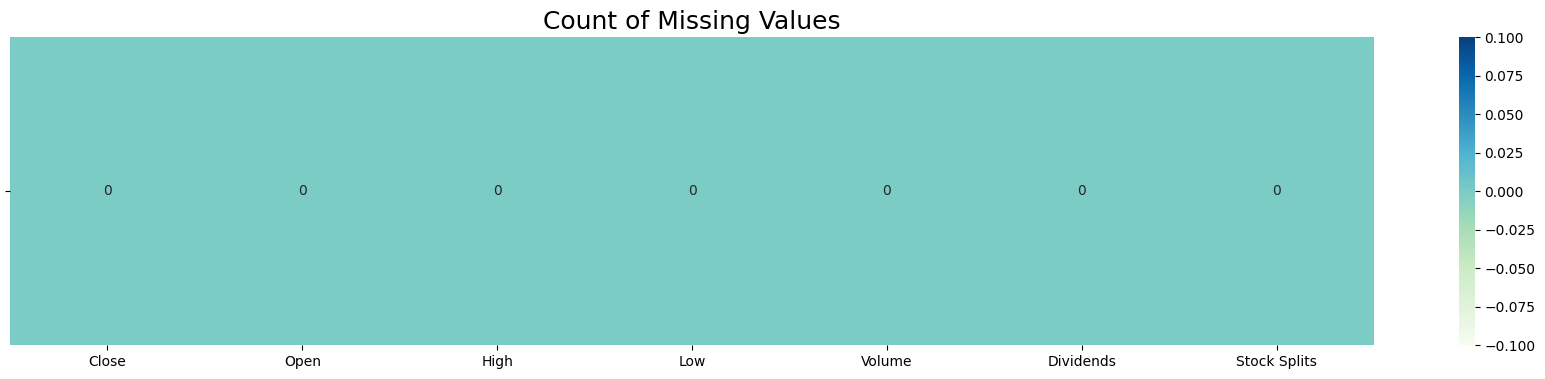

In [ ]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

In [ ]:
df.describe().T.style.background_gradient(cmap='GnBu', axis=1)

In [ ]:
# finding unique data
df.apply(lambda x: len(x.unique()))

Close           2137
Open            2170
High            2170
Low             2170
Volume          2104
Dividends          2
Stock Splits       2
dtype: int64

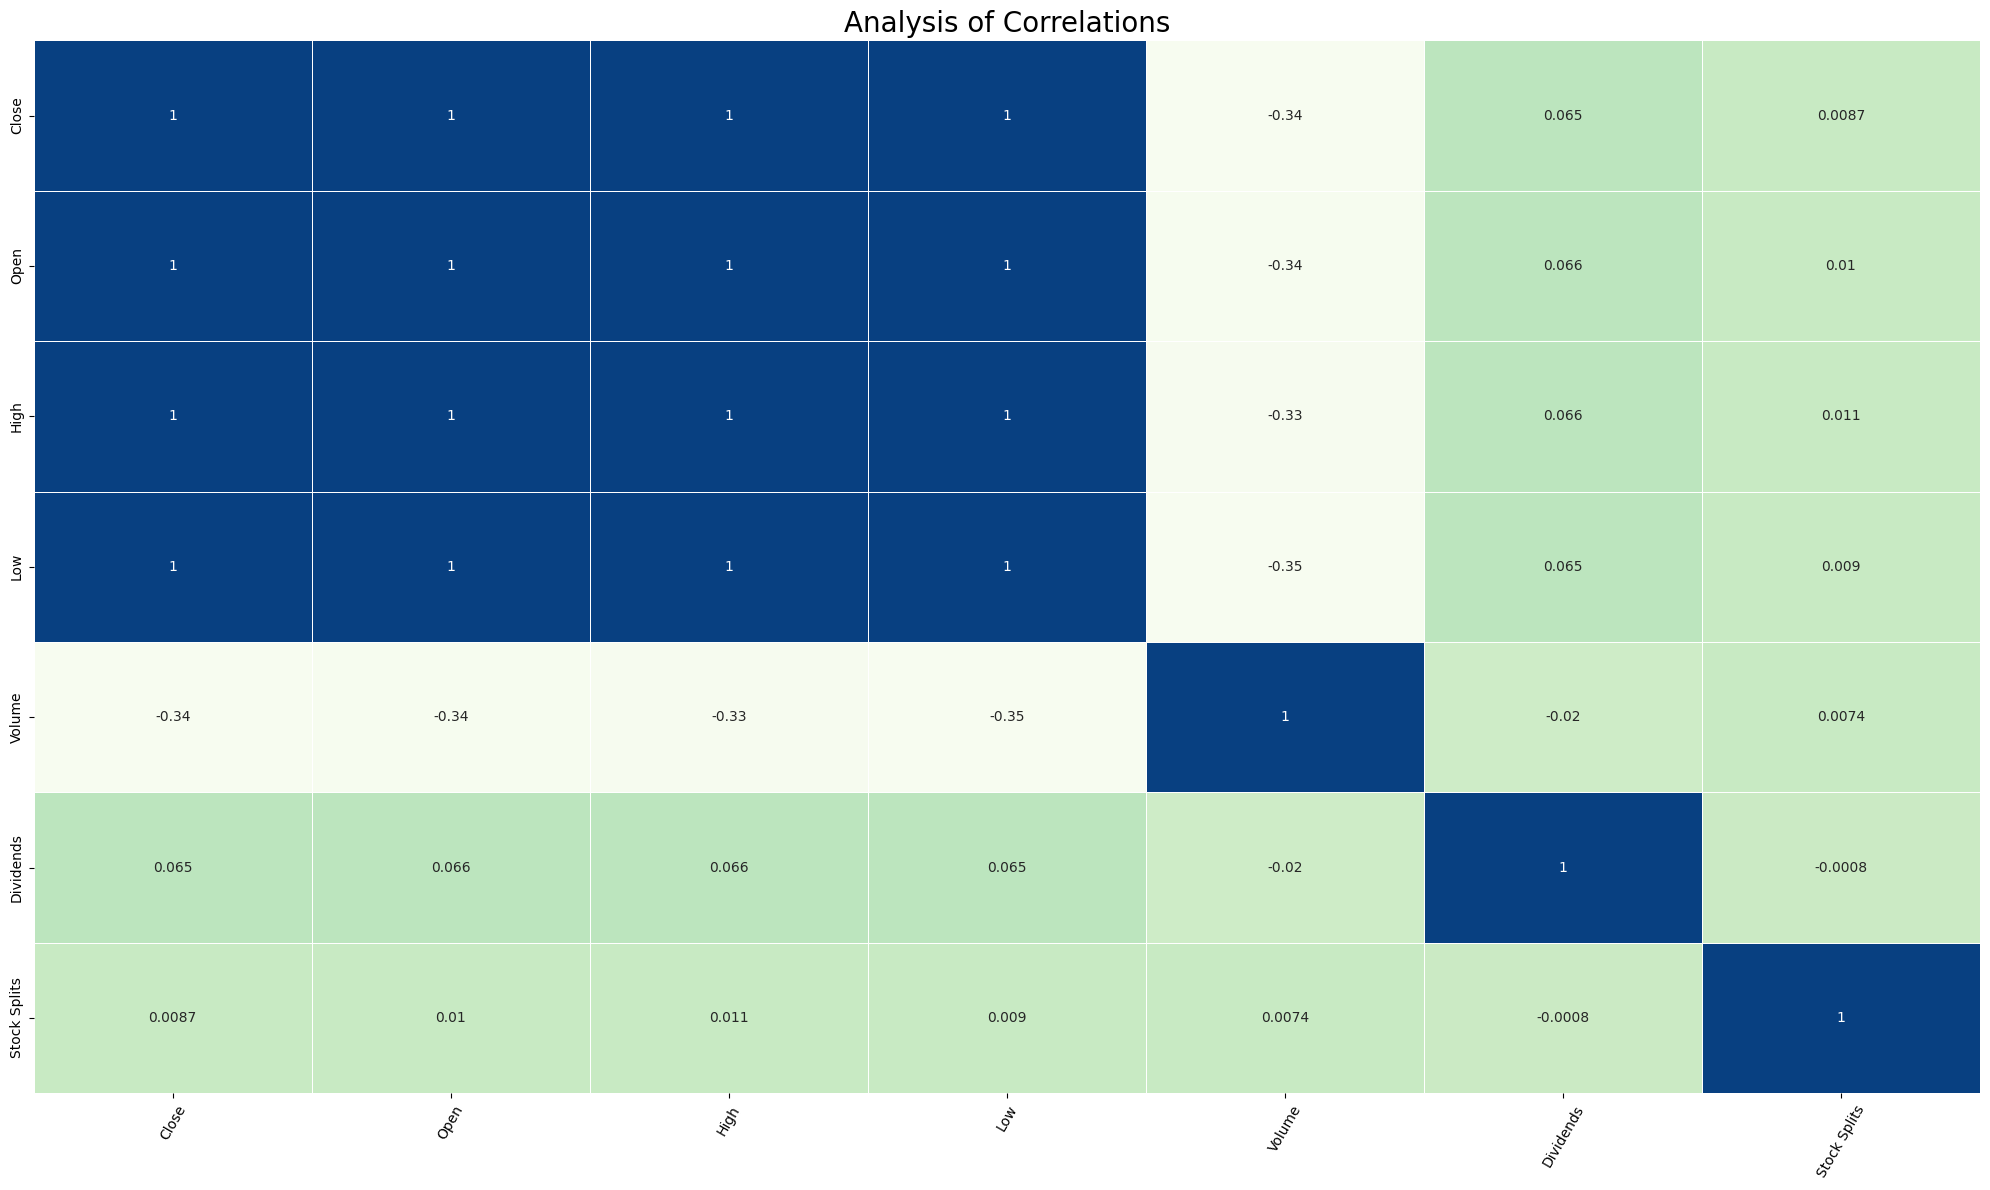

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

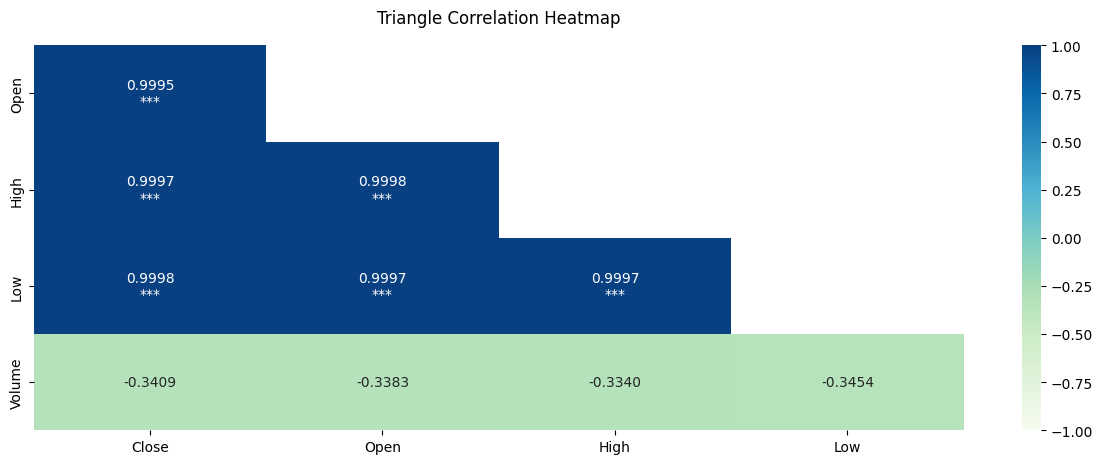

In [ ]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='GnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)
plt.show()

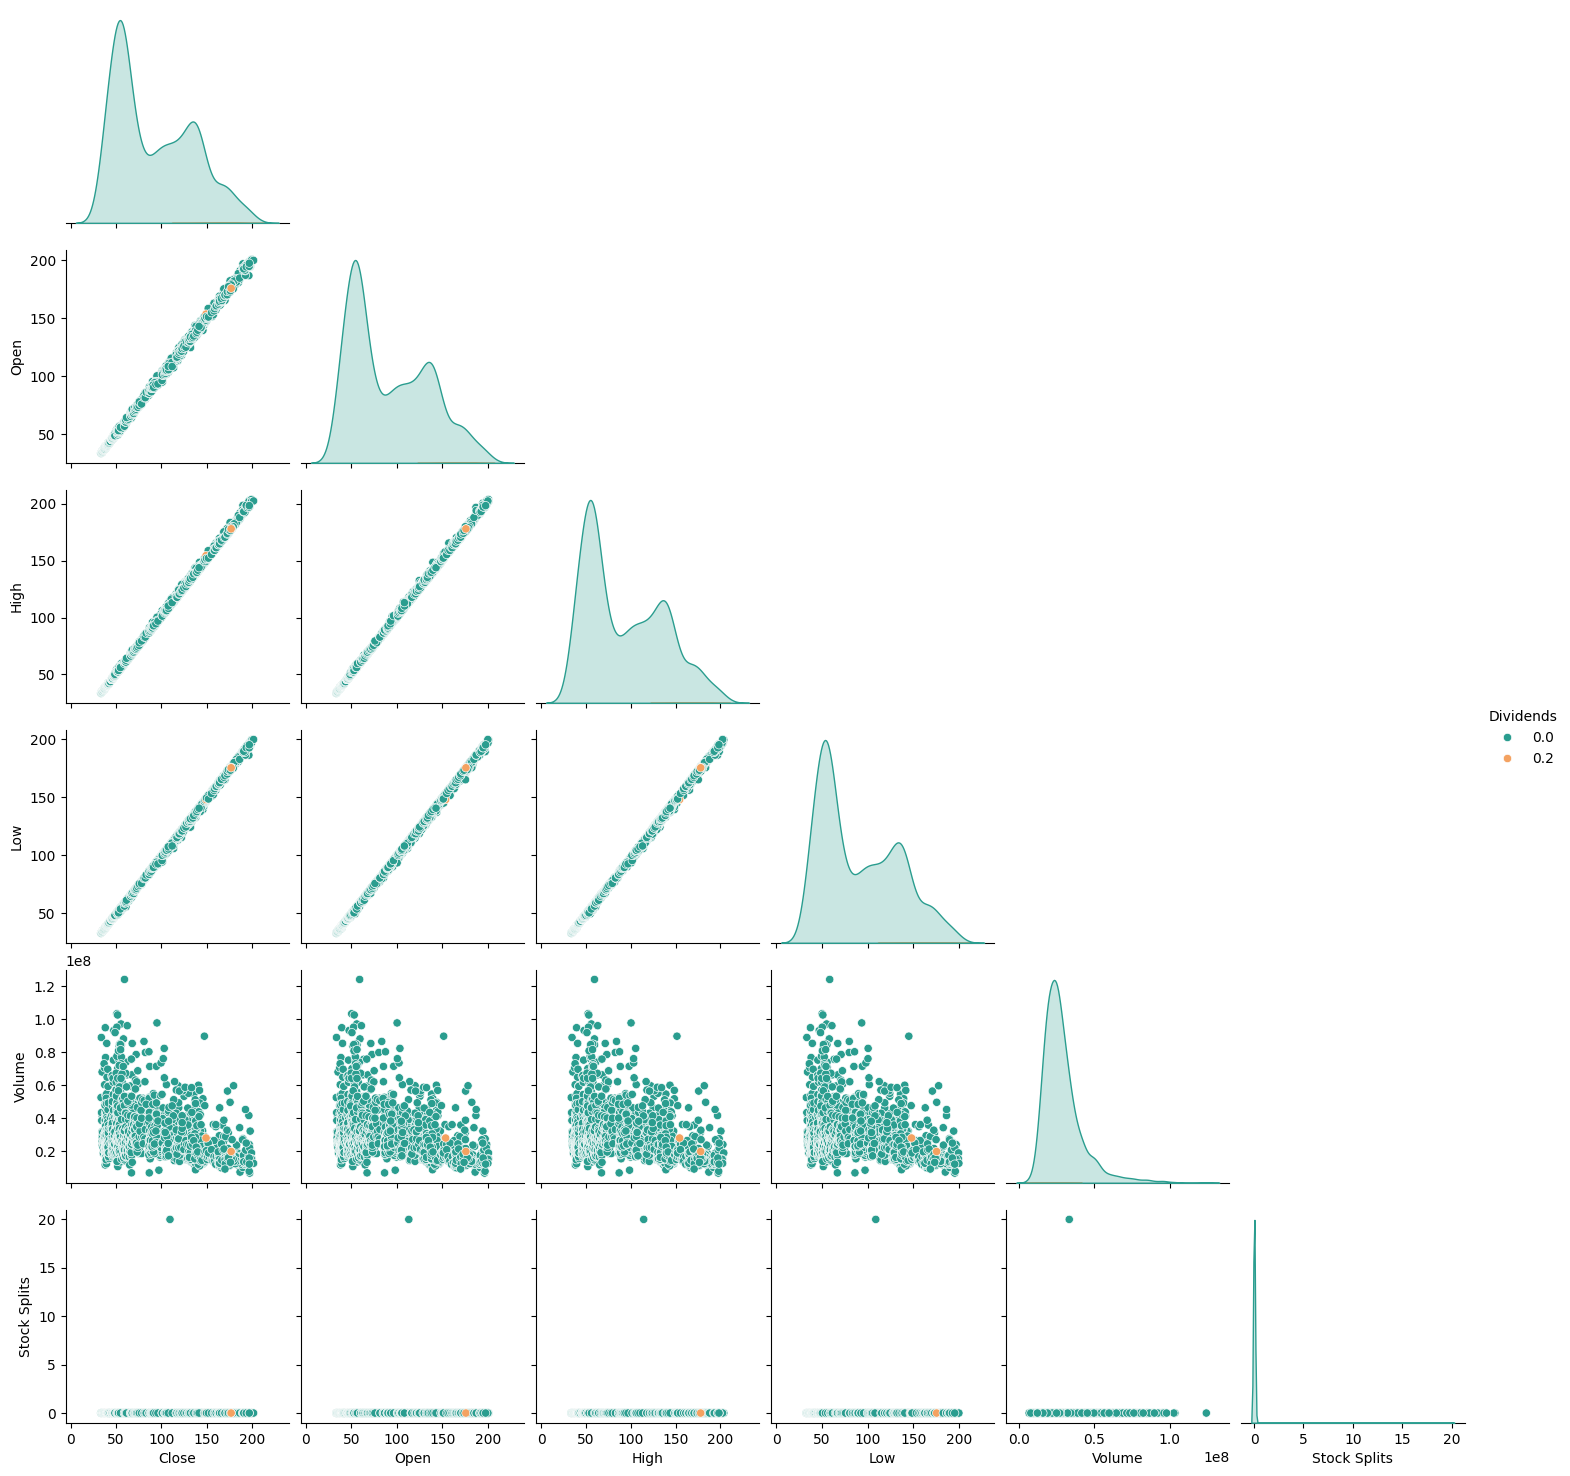

In [ ]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(['#2a9d8f', '#f4a261'])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette,corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

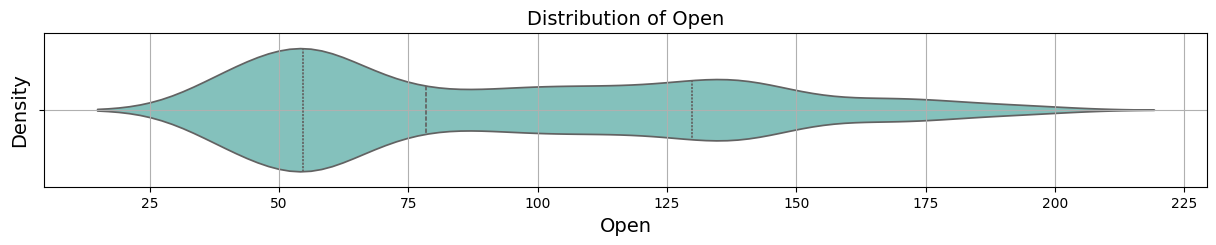

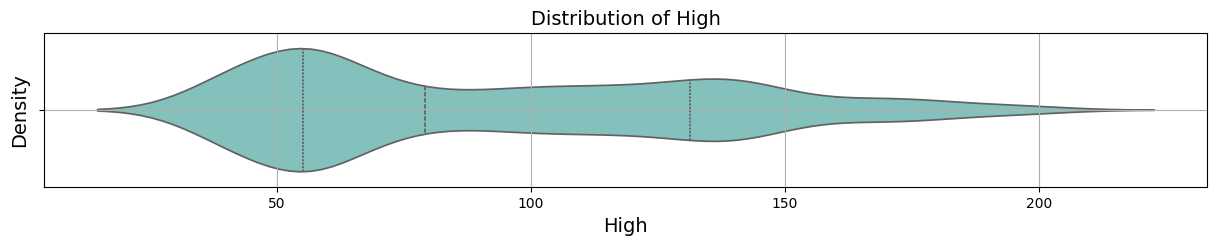

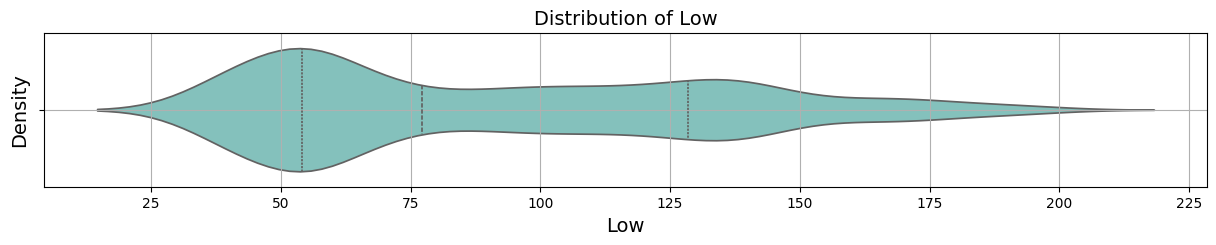

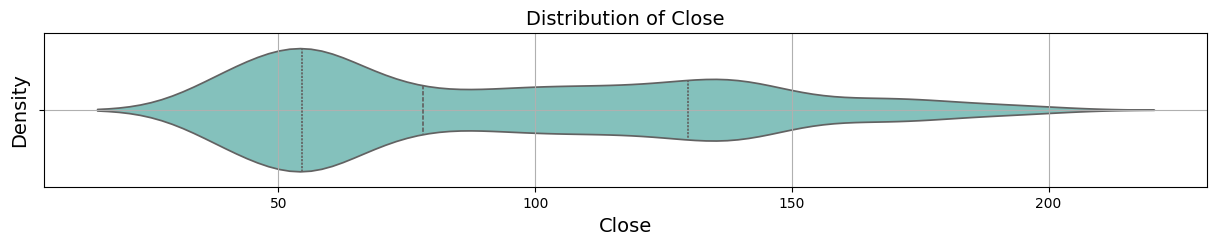

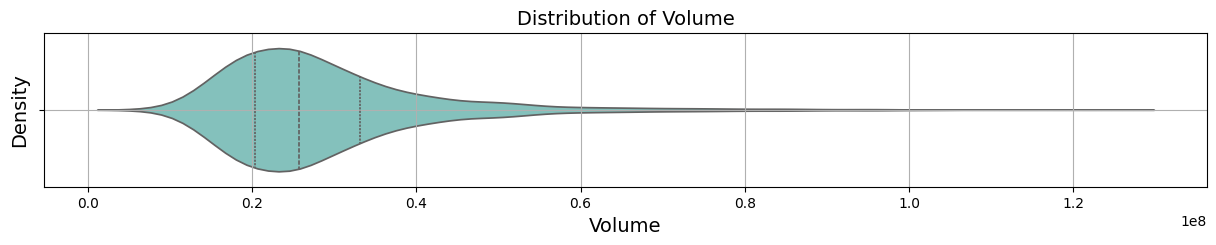

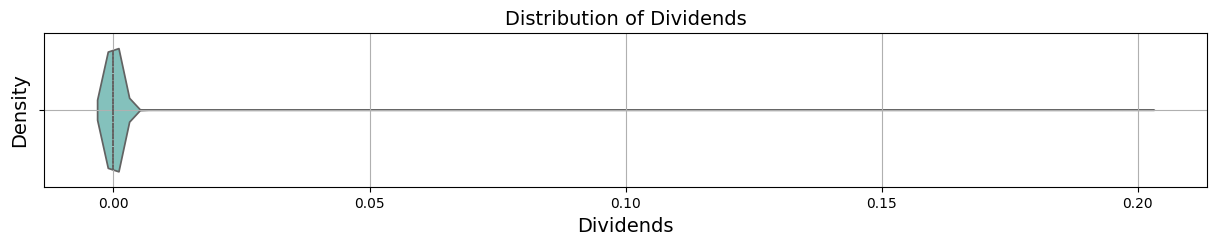

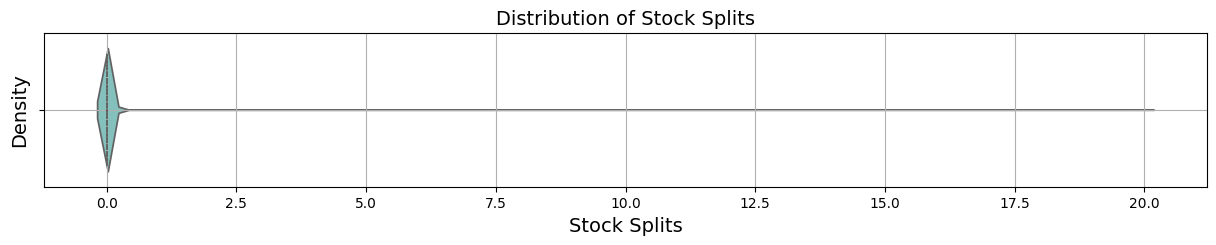

In [ ]:
palette = "GnBu"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartile")
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True)
    plt.show()

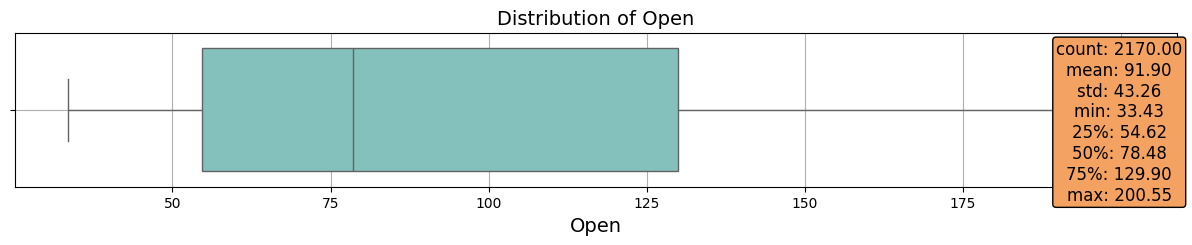

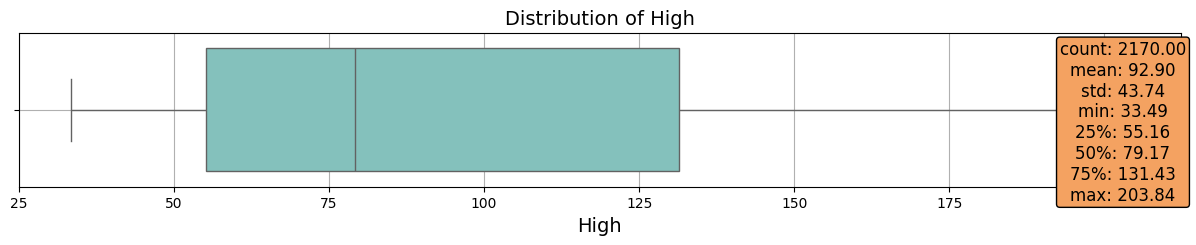

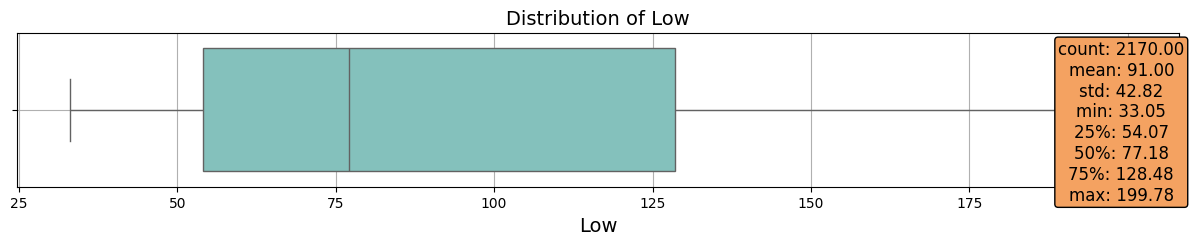

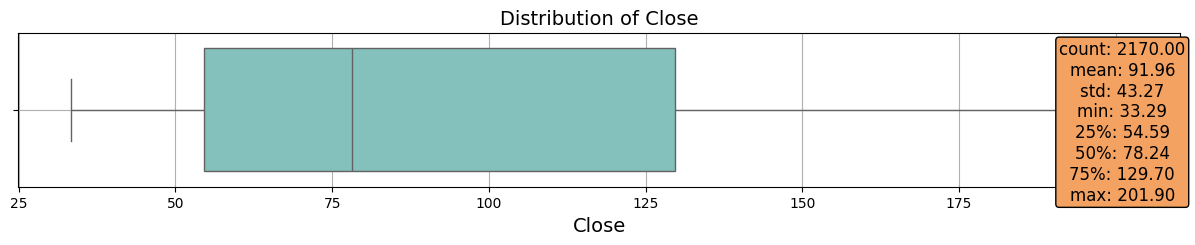

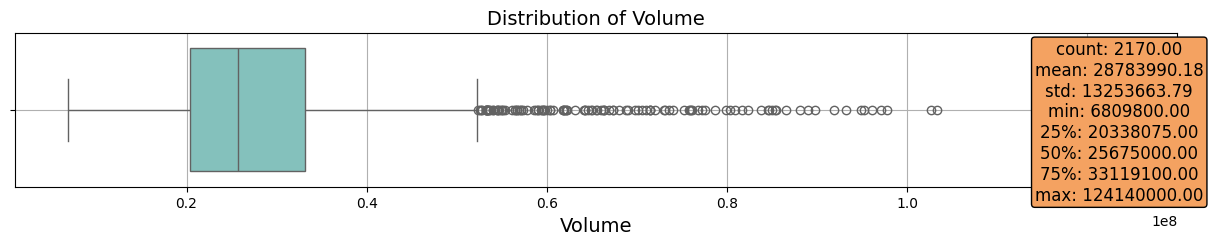

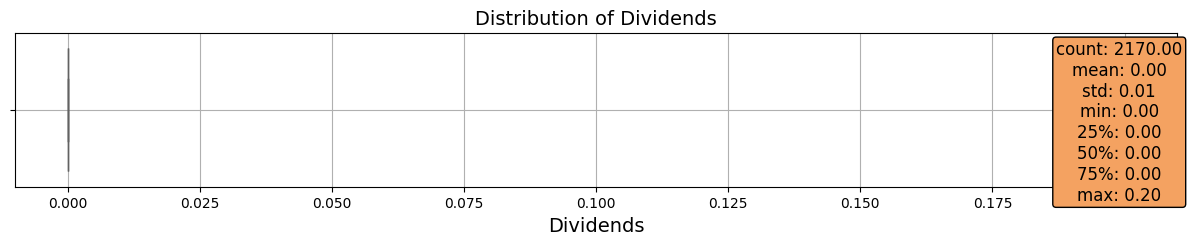

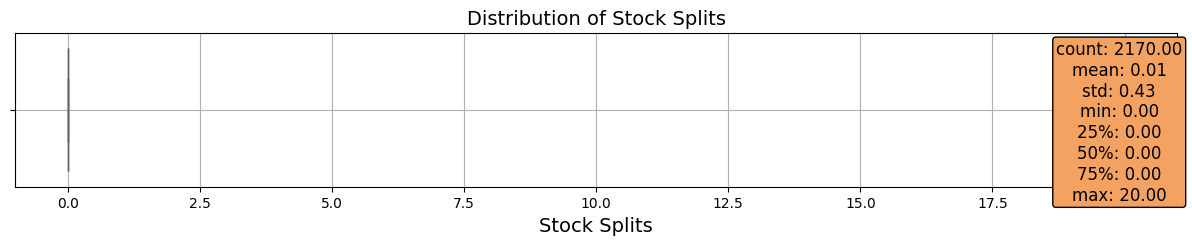

In [ ]:
palette = "GnBu"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

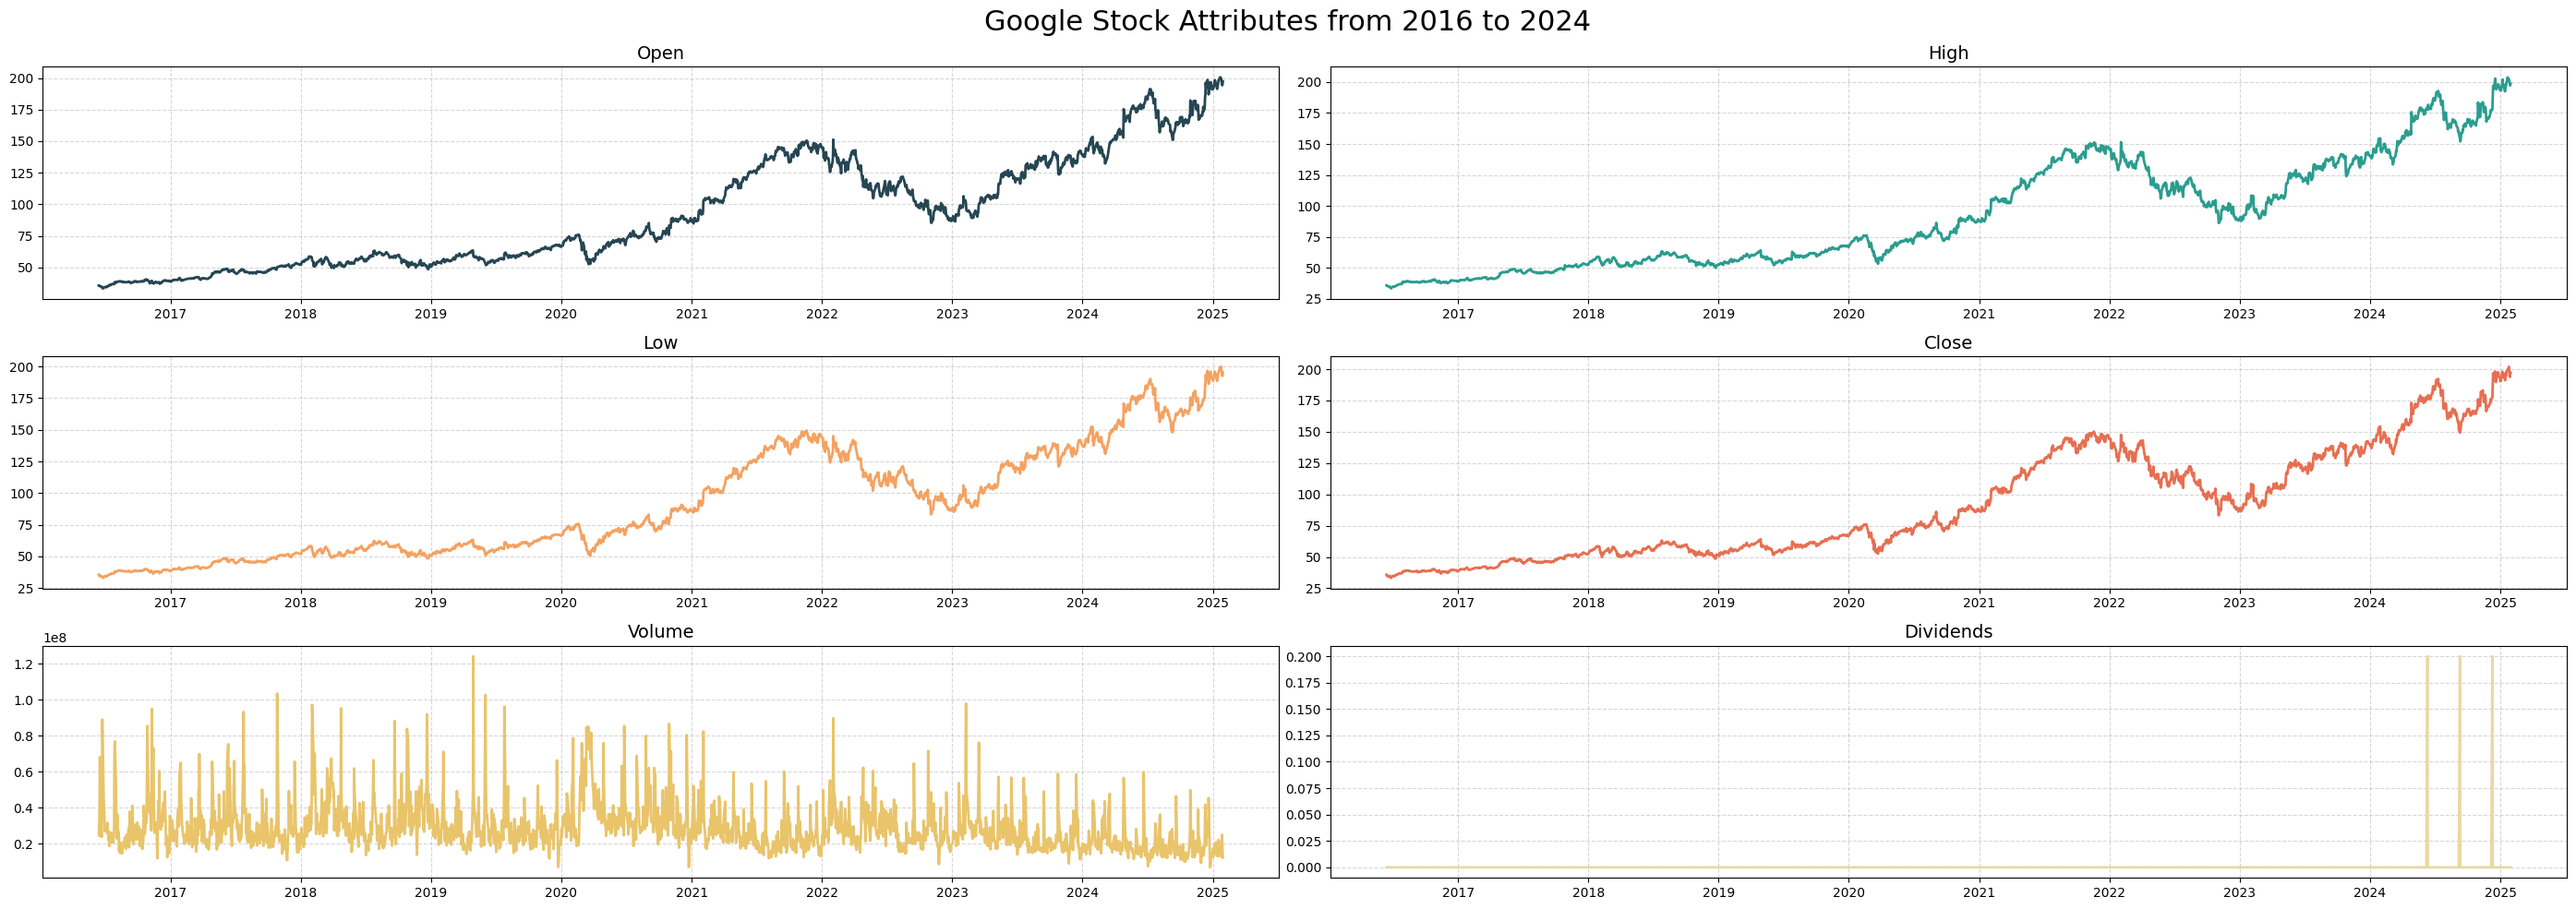

In [ ]:
import matplotlib.pyplot as plt
x=df.index
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51','#e9c46a', '#e9d8a6']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df['Open'], color=colors[0], linewidth=2)
plt.title('Open', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df['High'], color=colors[1], linewidth=2)
plt.title('High', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df['Low'], color=colors[2], linewidth=2)
plt.title('Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df['Close'], color=colors[3], linewidth=2)
plt.title('Close', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df['Volume'], color=colors[4], linewidth=2)
plt.title('Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle('Google Stock Attributes from 2016 to 2024', fontsize=22, y=0.98)
plt.tight_layout()
plt.show()

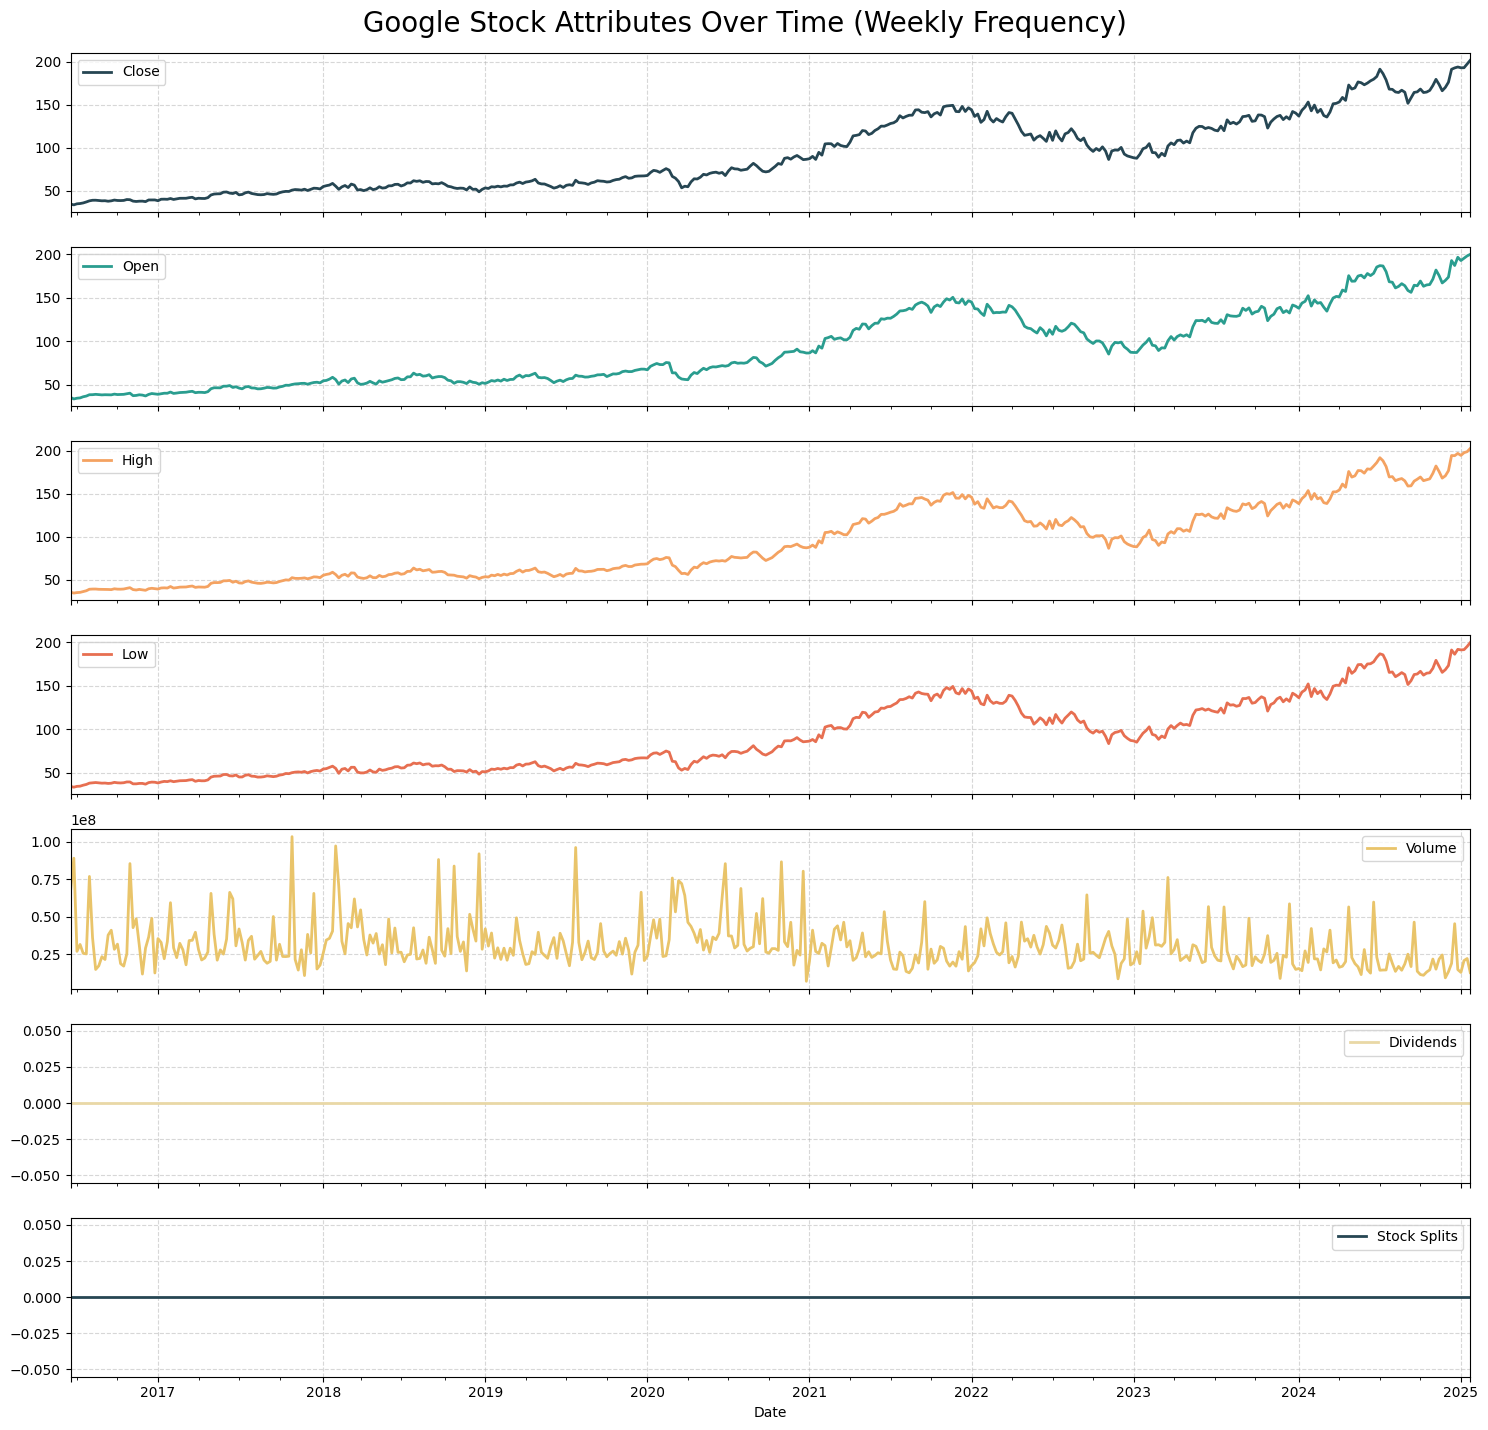

In [ ]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Weekly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

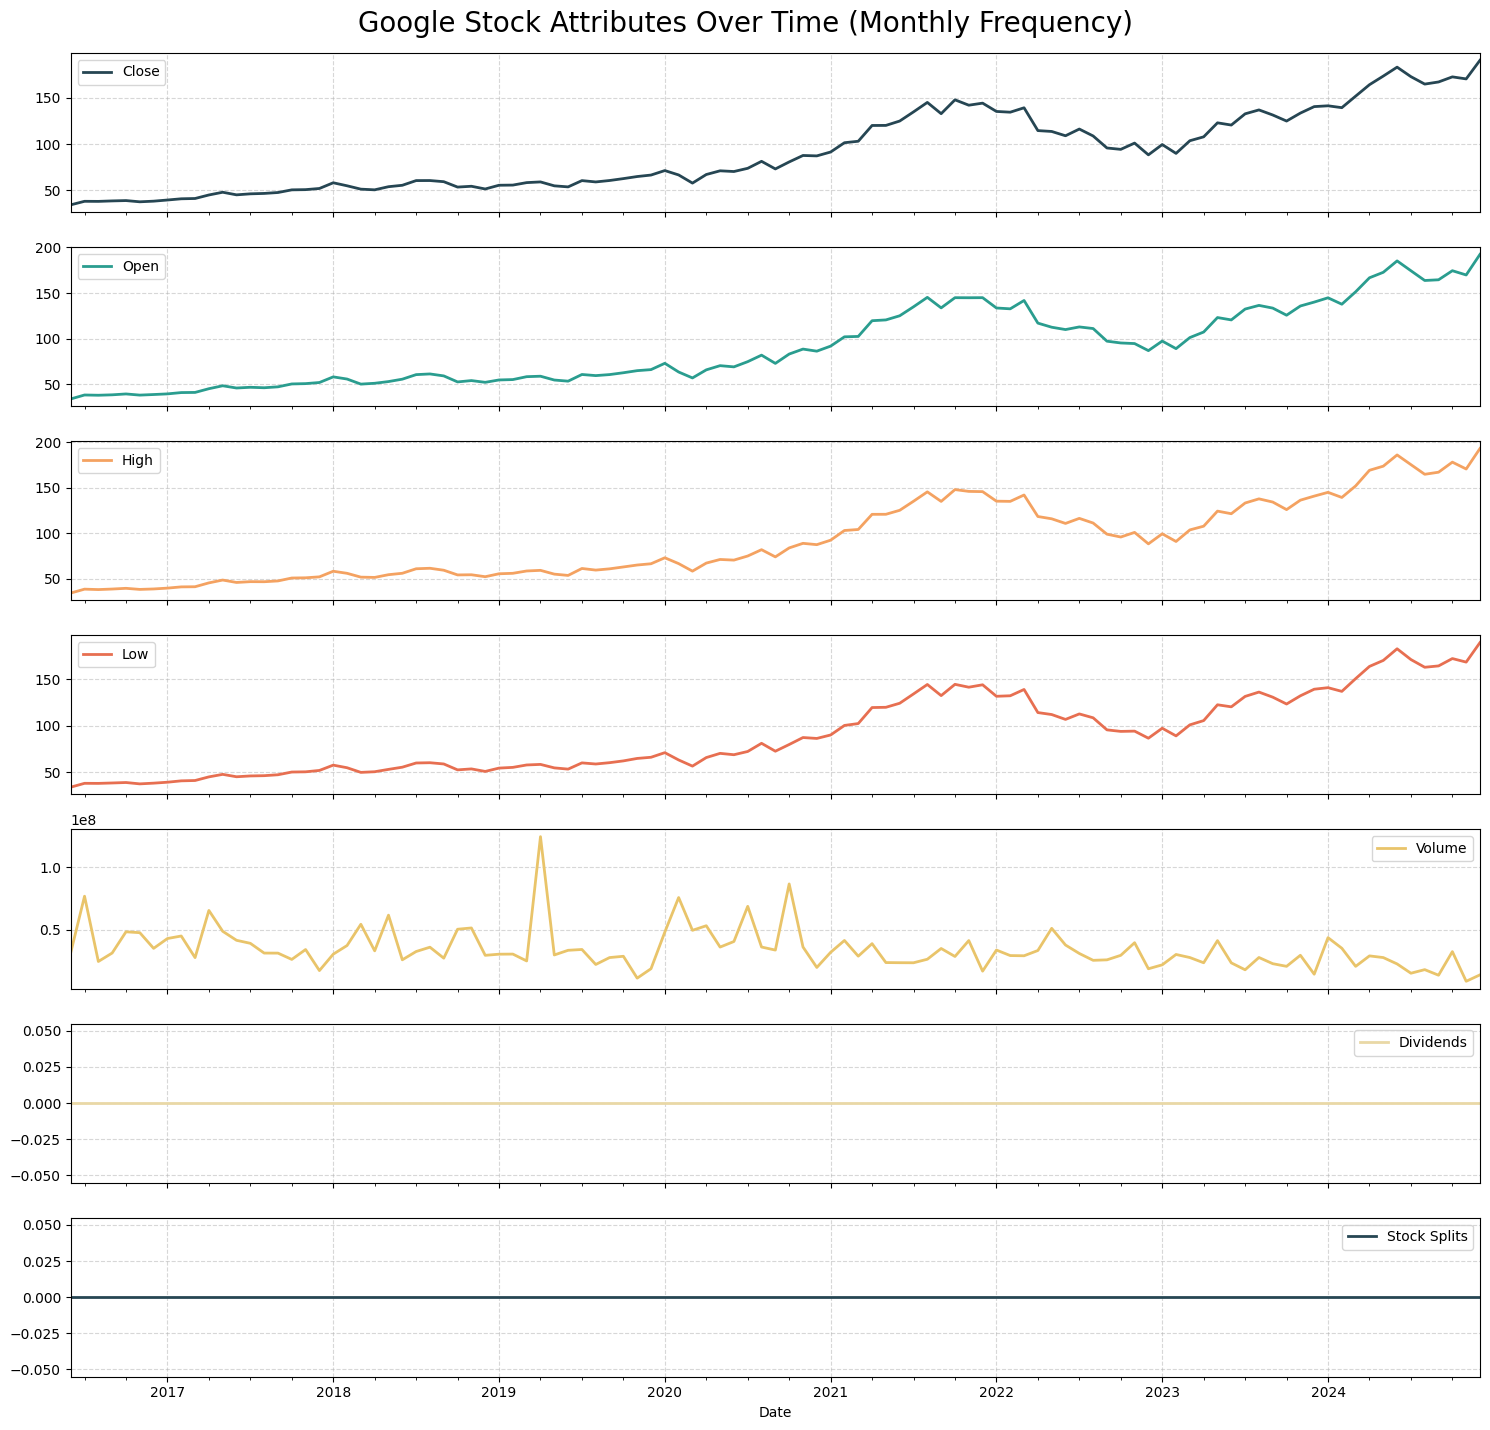

In [ ]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('M', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Monthly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# trace for candlestick chart
candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick',
    increasing=dict(line=dict(color='#2a9d8f')),
    decreasing=dict(line=dict(color='#f4a261')))
# layout for the chart with custom colors
layout = go.Layout(
    title='GOOG Candlestick Chart',
    xaxis=dict(title='Date', color='#2a9d8f'),
    yaxis=dict(title='Price', color='#2a9d8f', rangemode='normal'),
    plot_bgcolor='rgba(0,0,0,0)',  # transparent background
    paper_bgcolor='rgba(255,255,255,0.85)')  # slight transparency on paper background)
# creating the figure
fig = go.Figure(data=[candletrace], layout=layout)
# removing the range slider and showing the figure
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

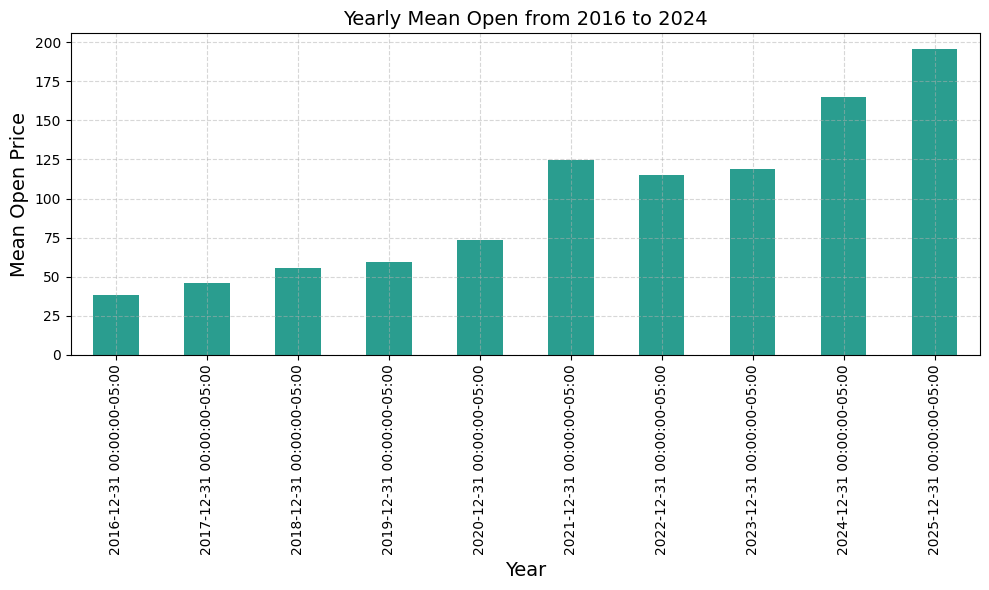

In [ ]:
import math
import yfinance as yf
import datetime as dt
# Resampling the 'Open' data by year-end and plotting the mean values
plt.figure(figsize=(10, 6))  # Set figure size
df['Open'].resample('A').mean().plot(kind='bar', color='#2a9d8f')  # Updated color
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)  # Title with larger font
plt.xlabel('Year', fontsize=14)  # X-axis label with larger font
plt.ylabel('Mean Open Price', fontsize=14)  # Y-axis label with larger font
plt.grid(True, linestyle='--', alpha=0.5)  # Grid with dashed lines
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

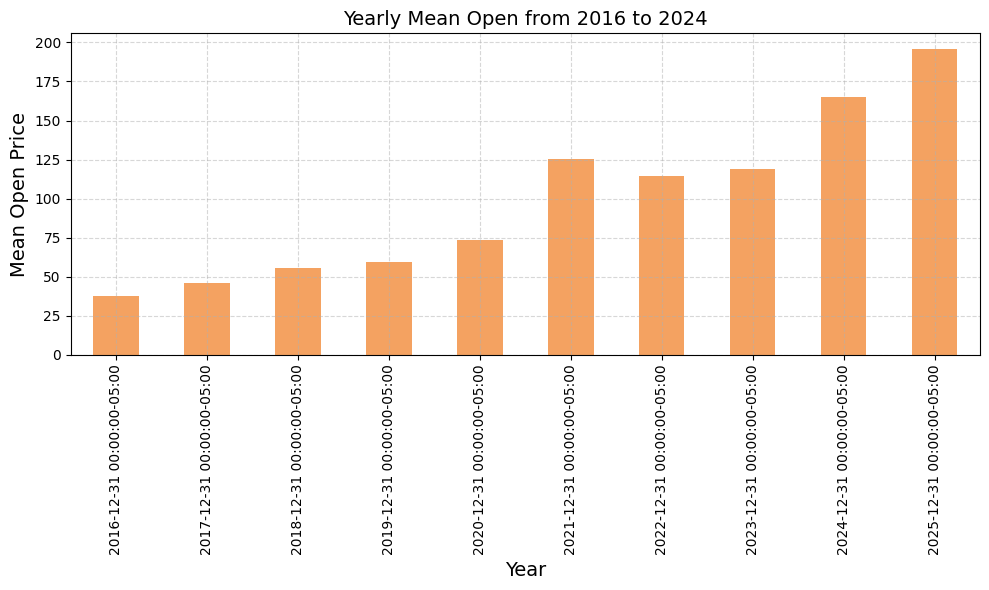

In [ ]:
plt.figure(figsize=(10, 6))
df['Close'].resample('A').mean().plot(kind='bar', color='#f4a261')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

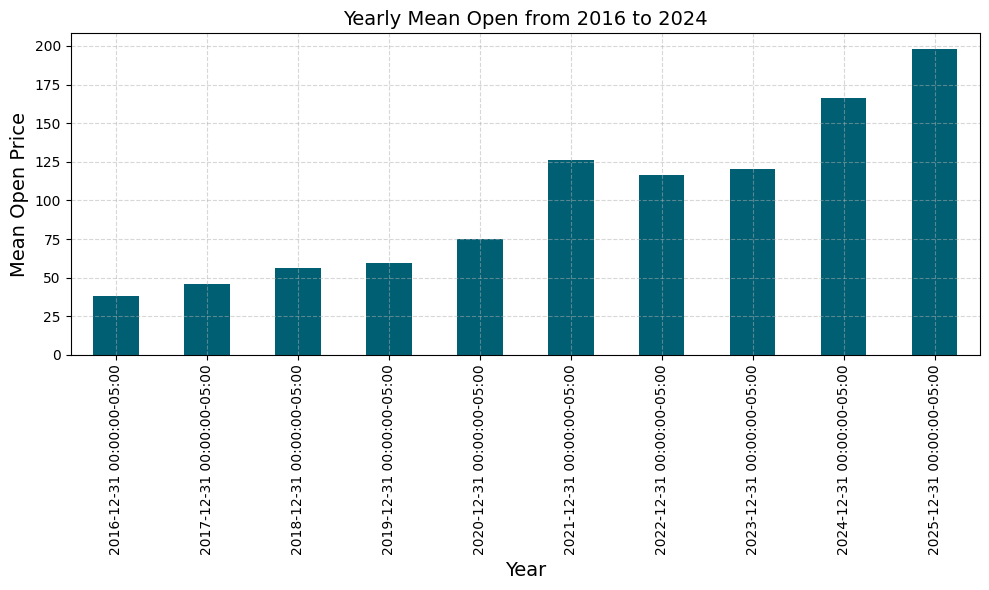

In [ ]:
plt.figure(figsize=(10, 6))
df['High'].resample('A').mean().plot(kind='bar', color='#005f73')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

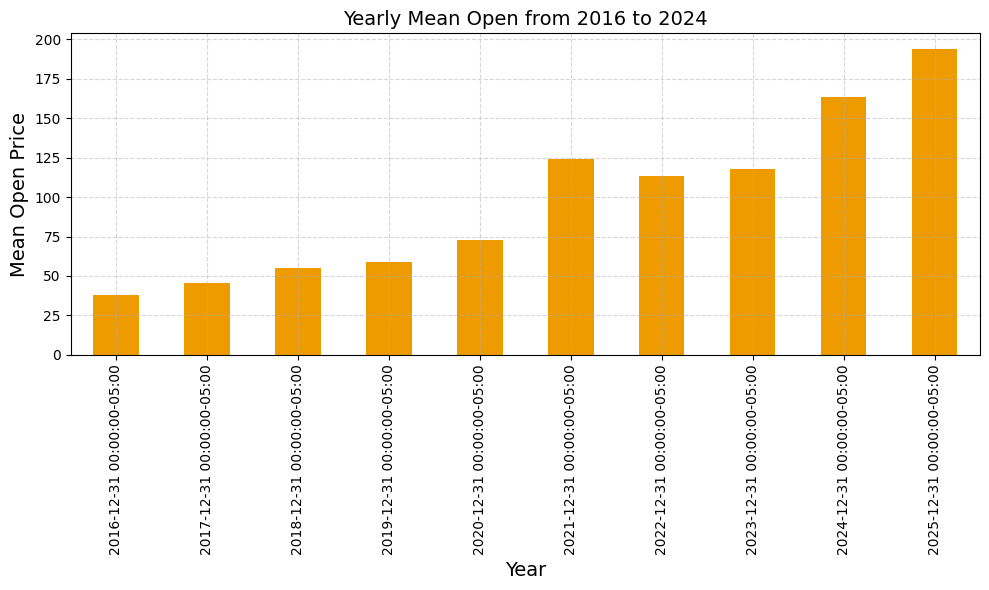

In [ ]:
plt.figure(figsize=(10, 6))
df['Low'].resample('A').mean().plot(kind='bar', color='#ee9b00')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

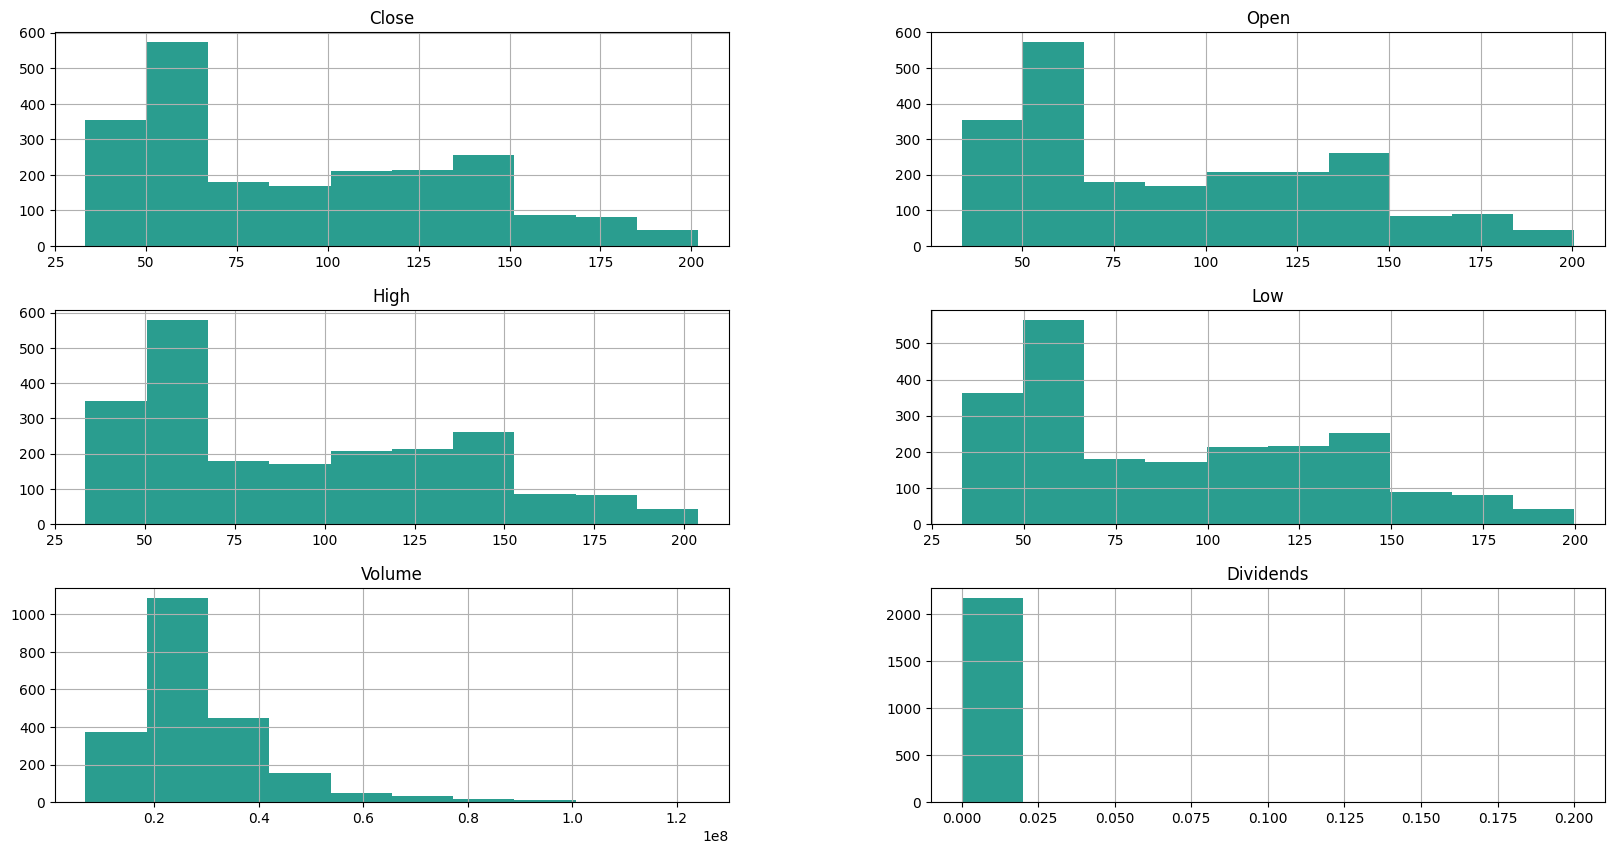

In [ ]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
hist=df1.hist(ax = ax , color= '#2a9d8f')

In [ ]:
df[['Close']]

Close
Date                                 
2016-06-14 00:00:00-04:00   35.784924
2016-06-15 00:00:00-04:00   35.817303
2016-06-16 00:00:00-04:00   35.390839
2016-06-17 00:00:00-04:00   34.462170
2016-06-20 00:00:00-04:00   34.561321
...                               ...
2025-01-23 00:00:00-05:00  199.580002
2025-01-24 00:00:00-05:00  201.899994
2025-01-27 00:00:00-05:00  193.770004
2025-01-28 00:00:00-05:00  197.070007
2025-01-29 00:00:00-05:00  197.179993

[2170 rows x 1 columns]

#### SMA  (Simple Moving Average)
Calculating the moving averages for certain periods and different window sizes.

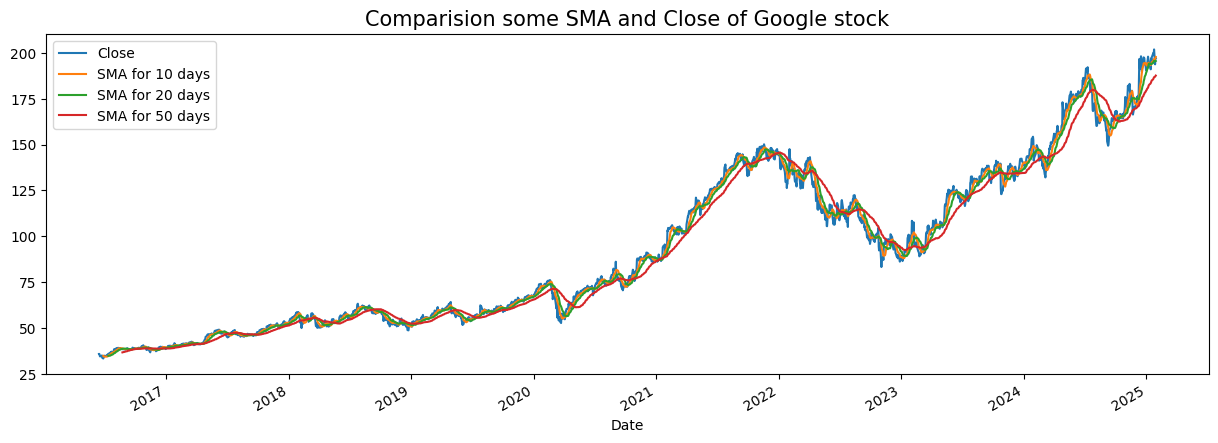

In [ ]:
md = [10, 20, 50]
for SMA in md:
    col = f'SMA for {SMA} days'
    df[col] = df['Close'].rolling(SMA).mean()
df[['Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some SMA and Close of Google stock', fontsize=15)
plt.show()

- The graph shows that the optimal durations for measuring the moving average are '10 and 20 days', as they effectively capture trends in the data while minimizing noise. (The 50-day moving average differs somewhat from the original data, whereas the 10-day and 20-day moving averages demonstrate stronger performance)

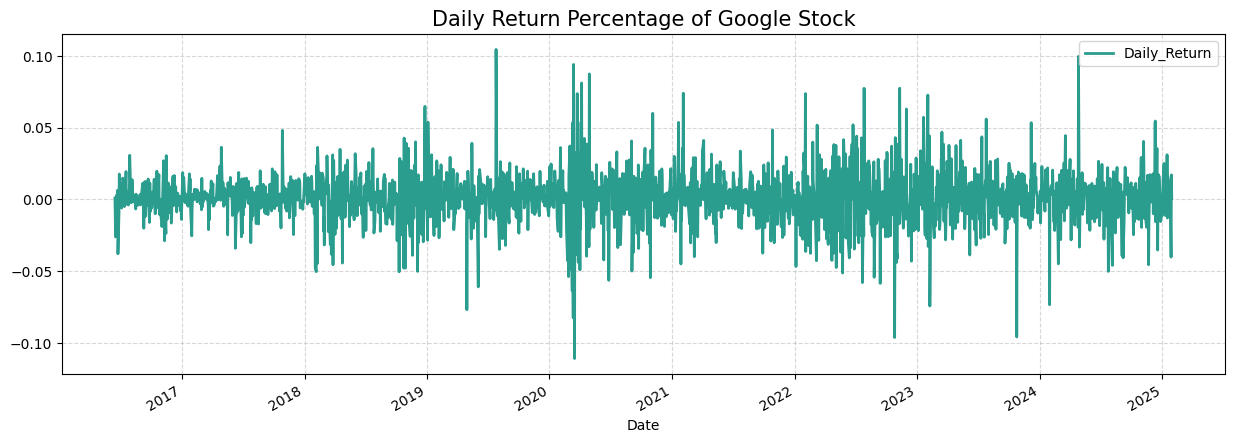

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(legend=True, figsize=(15, 5), color='#2a9d8f', linewidth=2)
plt.title('Daily Return Percentage of Google Stock', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Create a deep copy of the original dataframe
df2 = df.copy(deep=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to each column individually
df2['Open'] = scaler.fit_transform(df2.Open.values.reshape(-1, 1))
df2['High'] = scaler.fit_transform(df2.High.values.reshape(-1, 1))
df2['Low'] = scaler.fit_transform(df2.Low.values.reshape(-1, 1))
df2['Close'] = scaler.fit_transform(df2.Close.values.reshape(-1, 1))
df2['Volume'] = scaler.fit_transform(df2.Volume.values.reshape(-1, 1))

# Select the relevant columns for further processing
df3 = df2[['Open', 'High', 'Low', 'Volume', 'Close']].values

# Output the shape of the resulting dataframe
df3.shape

(2170, 5)

In [ ]:
seq_len = 11
sequence = []
for index in range(len(df3) - seq_len + 1):
    sequence.append(df3[index: index + seq_len])
sequence = np.array(sequence)
print(sequence.shape)

(2160, 11, 5)


In [ ]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = split_data(sequence)
print("Train:", train_data.shape, "Validation:", val_data.shape, "Test:", test_data.shape)

Train: (1728, 11, 5) Validation: (216, 11, 5) Test: (216, 11, 5)


In [ ]:
x_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1]
x_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]
x_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1728, 10, 5)
y_train shape: (1728,)
x_valid shape: (216, 10, 5)
y_valid shape: (216,)
x_test shape: (216, 10, 5)
y_test shape: (216,)


In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(LSTM(units=32, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32,
                       validation_data=(x_valid, y_valid))

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0560 - val_loss: 0.0030
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.

In [ ]:
# Predict on the test data
y_pred = model_lstm.predict(x_test)

# Evaluate the predictions
test_loss = model_lstm.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 
Test Loss: 0.002810609294101596


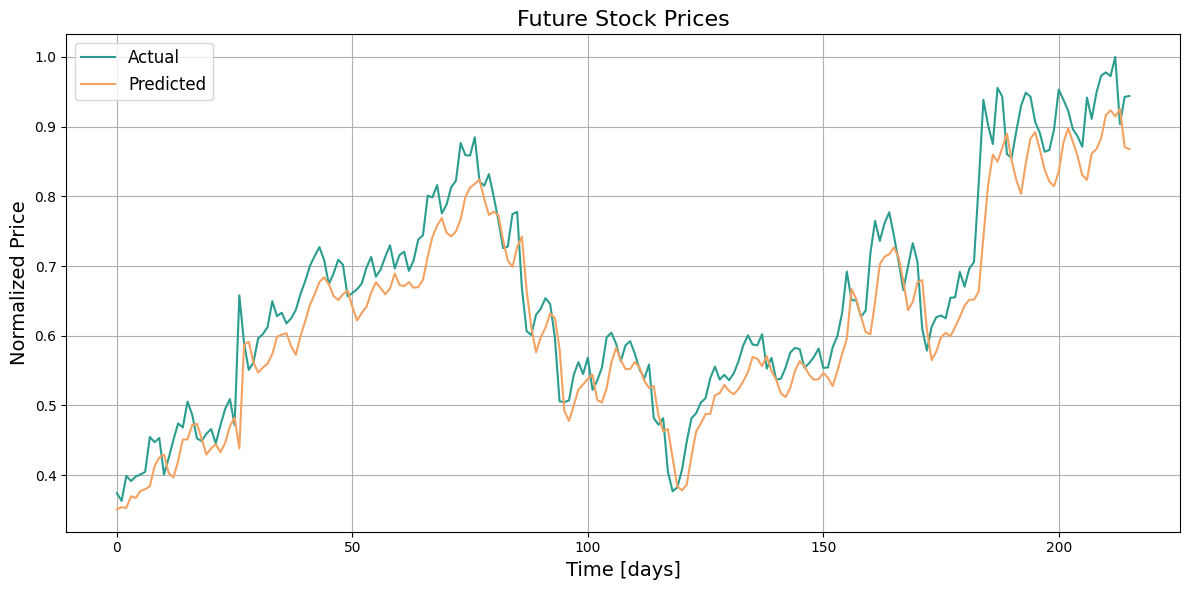

In [ ]:
plt.figure(figsize=(12, 6))
idx = 0
plt.plot(y_test, color='#2a9d8f', label='Actual')
plt.plot(y_pred, color='#f4a261', label='Predicted')
plt.title('Future Stock Prices', fontsize=16)
plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

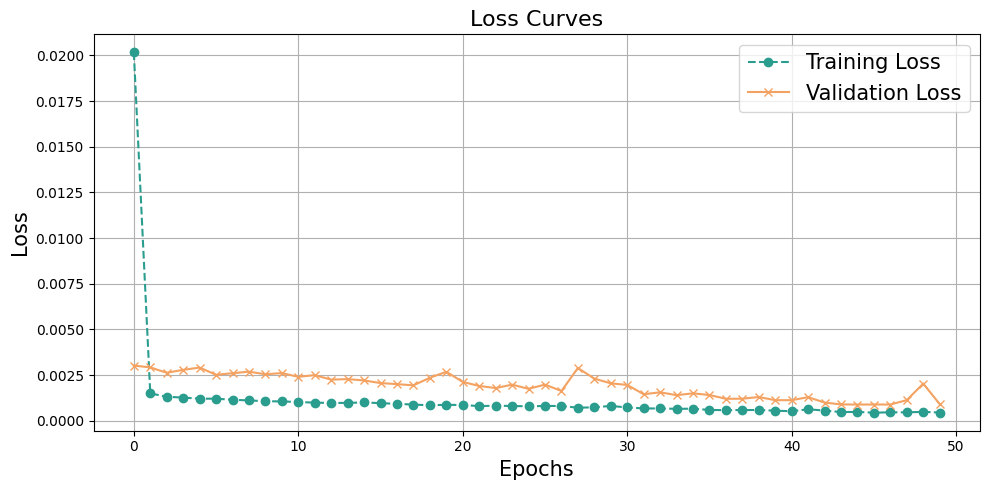

In [ ]:
# Plotting the loss curves
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))

    # Loss curve
    plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')

    plt.title('Loss Curves', fontsize=16)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)

In [ ]:
print("### Model Summary ###")
model_lstm.summary()

### Model Summary ###


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,563 (365.48 KB)

 Trainable params: 31,187 (121.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,376 (243.66 KB)

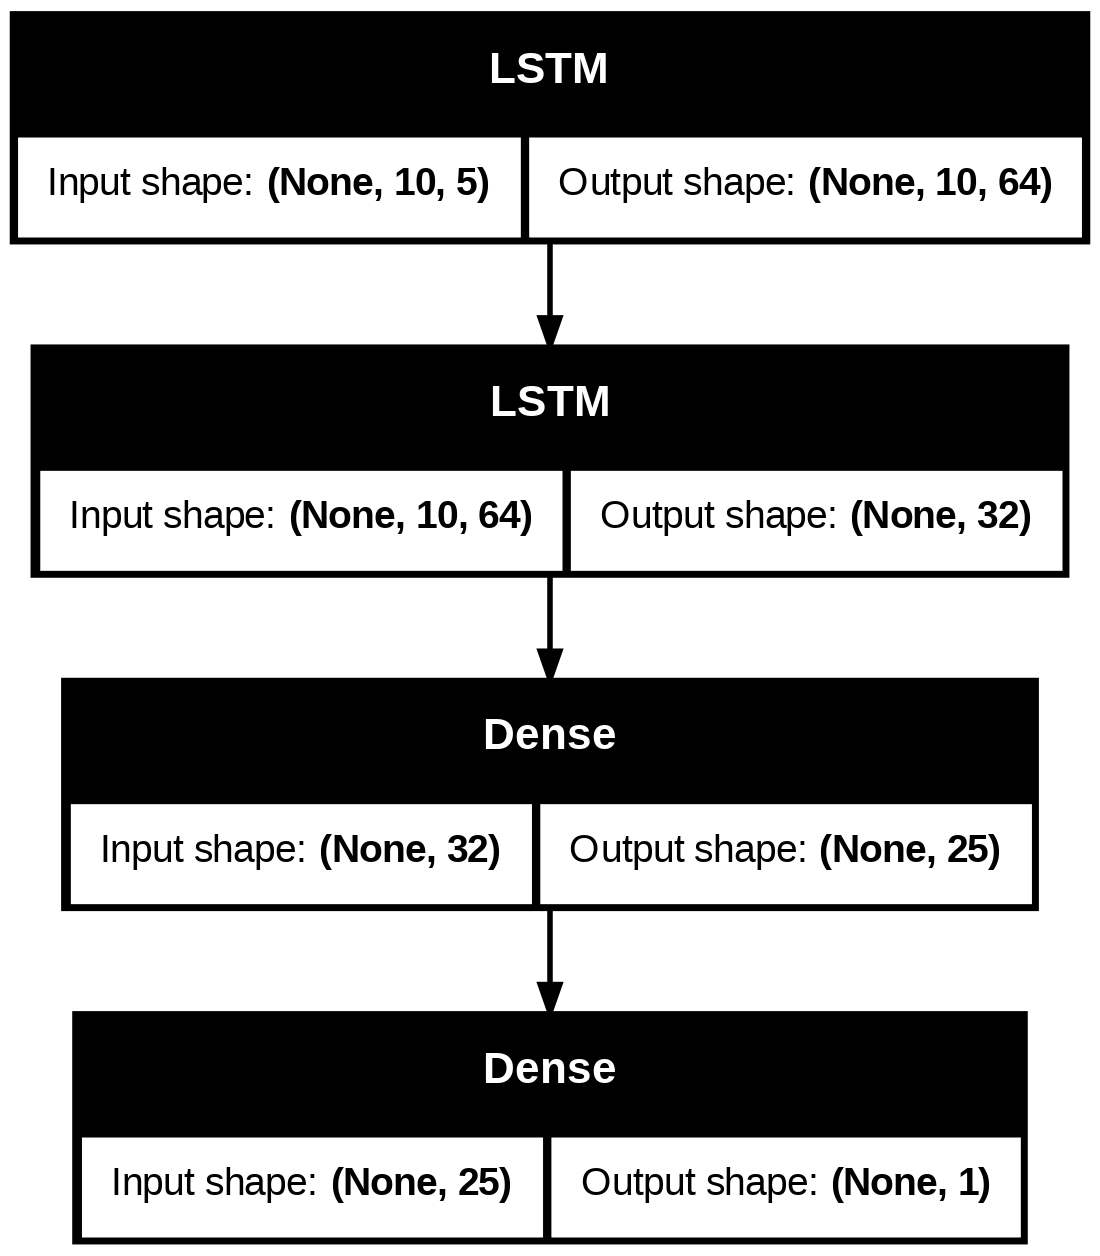

In [ ]:
# Save the model architecture as an image
plot_model(model_lstm, to_file='model_architecture.png', show_shapes=True)

# Display the saved model architecture image
Image(filename='model_architecture.png')

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


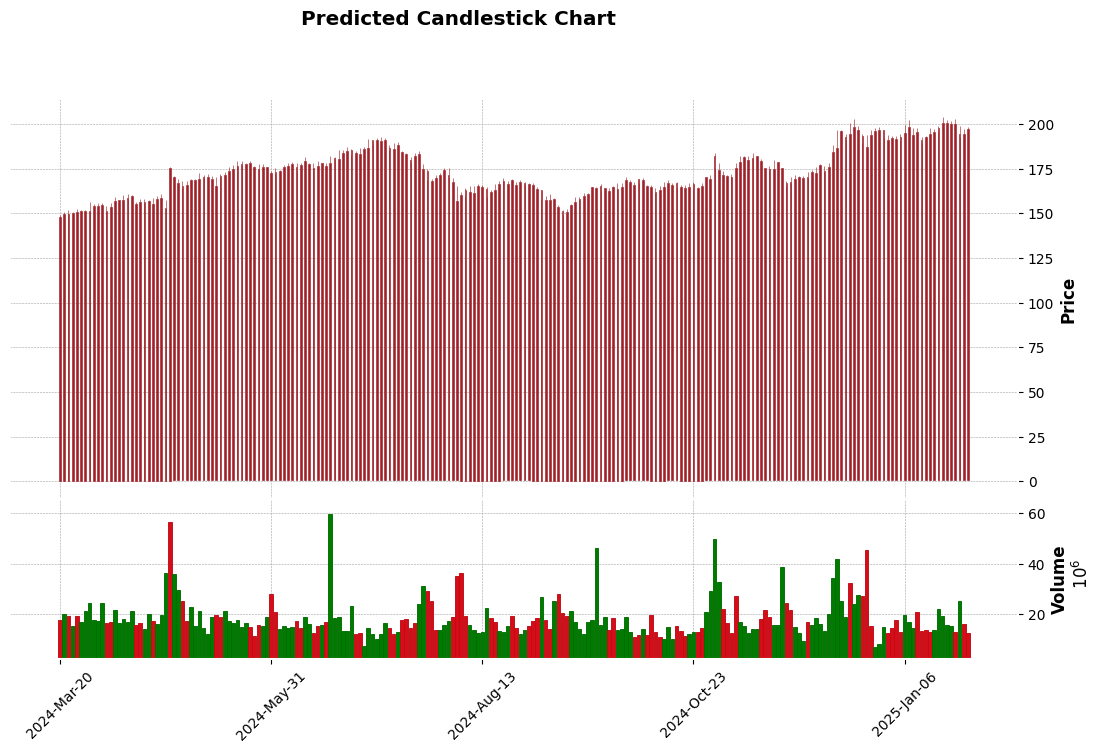

In [ ]:
import mplfinance as mpf
predicted_prices = model_lstm.predict(x_test)
predicted_df = df.iloc[-len(predicted_prices):].copy()
predicted_df['Predicted Close'] = predicted_prices
predicted_df['Open'] = predicted_df['Open']
predicted_df['High'] = predicted_df['High']
predicted_df['Low'] = predicted_df['Low']
predicted_df['Close'] = predicted_df['Predicted Close']
final_df = predicted_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
final_df.index = pd.to_datetime(predicted_df.index)
mpf.plot(
    final_df,
    type='candle',
    volume=True,
    style='charles',
    title="Predicted Candlestick Chart",
    ylabel="Price",
    ylabel_lower="Volume",
    figsize=(14, 8)
)

In [ ]:
df = df.reset_index()  # This will move the index (Date) into a regular column.

In [ ]:
# Assume df contains the main data with daily prices.
# Example data setup:
# df = pd.DataFrame({
#     'Open': [...],
#     'High': [...],
#     'Low': [...],
#     'Close': [...],
# })

# Ensure the DataFrame is ordered correctly
df['Date'] = pd.to_datetime(df['Date'])  # Assuming there is a column named Date
df.set_index('Date', inplace=True)

# Select prices for the candlestick
final_df = df[['Open', 'High', 'Low', 'Close']]

# Create the candlestick chart
candlestick_trace = go.Candlestick(
    x=final_df.index,
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    increasing_line_color='#2a9d8f',  # Color for increasing candles
    decreasing_line_color='#f4a261',    # Color for decreasing candles
)

# Create the figure
fig = go.Figure(data=[candlestick_trace])

# Add title and labels
fig.update_layout(
    title='Predicted Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Disable the range slider below the chart
    template='plotly_white',            # Use a light template
    height=600,                         # Height of the chart
    width=1000                          # Width of the chart
)

# Show the chart
fig.show()


In [ ]:
# Predicting the next 10 days
latest_prediction = []
last_seq = x_test[:-1]

for _ in range(10):
    prediction = model_lstm.predict(last_seq)
    latest_prediction.append(prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
df = df.reset_index()  # This will move the index (Date) into a regular column.

In [ ]:
predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = df['Date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

# Iterate over all features
for i, feature_name in enumerate(['Open', 'High', 'Low', 'Volume', 'Close']):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=next_10_days,
        y=predicted_data_next[:, i],
        mode='lines+markers',
        name=f'Predicted {feature_name.capitalize()} Prices',
        line=dict(color='#f4a261'),
        marker=dict(color='#f4a261')
    ))

    fig.update_layout(
        title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
        xaxis_title='Date',
        yaxis_title=f'{feature_name.capitalize()} Price',
        plot_bgcolor='white'
    )

    fig.show()

<a id="pt"></a>
<div style="background-color: #f4a261; font-family: 'Times New Roman', serif; font-size: 24px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
    Modeling (PyTorch)
</div>

In [ ]:
tck = yf.Ticker("GOOG")
# defining the start date
start_date = "2016-06-14"
# historical data
df5 = tck.history(start=start_date, end=None)
df5

Open        High         Low       Close  \
Date                                                                        
2016-06-14 00:00:00-04:00   35.695744   35.994171   35.528342   35.784924   
2016-06-15 00:00:00-04:00   35.821290   36.019575   35.737093   35.817303   
2016-06-16 00:00:00-04:00   35.617525   35.704215   35.037110   35.390842   
2016-06-17 00:00:00-04:00   35.305639   35.314112   34.299356   34.462170   
2016-06-20 00:00:00-04:00   34.813410   34.998247   34.546372   34.561317   
...                               ...         ...         ...         ...   
2025-01-23 00:00:00-05:00  199.979996  201.940002  196.820007  199.580002   
2025-01-24 00:00:00-05:00  199.850006  202.570007  199.783997  201.899994   
2025-01-27 00:00:00-05:00  194.190002  198.669998  192.699997  193.770004   
2025-01-28 00:00:00-05:00  194.649994  197.229996  192.610001  197.070007   
2025-01-29 00:00:00-05:00  197.369995  198.460007  195.190002  197.179993   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0  
...                             ...        ...           ...  
2025-01-23 00:00:00-05:00  15170800        0.0           0.0  
2025-01-24 00:00:00-05:00  12732400        0.0           0.0  
2025-01-27 00:00:00-05:00  24970200        0.0           0.0  
2025-01-28 00:00:00-05:00  15939200        0.0           0.0  
2025-01-29 00:00:00-05:00  12235800        0.0           0.0  

[2170 rows x 7 columns]

In [ ]:
df5 = df5.reset_index()  # This will move the index (Date) into a regular column.

In [ ]:
df5['Volume'] = df5['Volume'].astype('float64')

In [ ]:
sma_days = [10, 20, 50]
# Calculate SMAs for each window size and add them to the dataframe
for sma in sma_days:
    col_name = f'SMA_{sma}days'
    df5[col_name] = df5['Close'].rolling(sma).mean()

In [ ]:
df5['SMA_10days'] = df5['SMA_10days'].fillna(df5['Close'])
df5['SMA_20days'] = df5['SMA_20days'].fillna(df5['Close'])
df5['SMA_50days'] = df5['SMA_50days'].fillna(df5['Close'])

df5.head(15)

Date       Open       High        Low      Close  \
0  2016-06-14 00:00:00-04:00  35.695744  35.994171  35.528342  35.784924   
1  2016-06-15 00:00:00-04:00  35.821290  36.019575  35.737093  35.817303   
2  2016-06-16 00:00:00-04:00  35.617525  35.704215  35.037110  35.390842   
3  2016-06-17 00:00:00-04:00  35.305639  35.314112  34.299356  34.462170   
4  2016-06-20 00:00:00-04:00  34.813410  34.998247  34.546372  34.561317   
5  2016-06-21 00:00:00-04:00  34.794977  35.012697  34.476621  34.672421   
6  2016-06-22 00:00:00-04:00  34.827861  34.917539  34.530031  34.748150   
7  2016-06-23 00:00:00-04:00  34.747652  34.971845  34.227019  34.967857   
8  2016-06-24 00:00:00-04:00  33.637632  34.346586  33.551941  33.640125   
9  2016-06-27 00:00:00-04:00  33.429884  33.494653  33.045465  33.293373   
10 2016-06-28 00:00:00-04:00  33.826955  33.894708  33.529523  33.880260   
11 2016-06-29 00:00:00-04:00  34.027737  34.248391  33.948520  34.083038   
12 2016-06-30 00:00:00-04:00  34.150792  34.492068  34.060118  34.481106   
13 2016-07-01 00:00:00-04:00  34.486088  34.907076  34.482598  34.835331   
14 2016-07-05 00:00:00-04:00  34.678398  34.722239  34.320682  34.623096   

        Volume  Dividends  Stock Splits  SMA_10days  SMA_20days  SMA_50days  
0   26122000.0        0.0           0.0   35.784924   35.784924   35.784924  
1   24290000.0        0.0           0.0   35.817303   35.817303   35.817303  
2   39650000.0        0.0           0.0   35.390842   35.390842   35.390842  
3   68048000.0        0.0           0.0   34.462170   34.462170   34.462170  
4   41650000.0        0.0           0.0   34.561317   34.561317   34.561317  
5   29312000.0        0.0           0.0   34.672421   34.672421   34.672421  
6   23686000.0        0.0           0.0   34.748150   34.748150   34.748150  
7   43428000.0        0.0           0.0   34.967857   34.967857   34.967857  
8   88980000.0        0.0           0.0   33.640125   33.640125   33.640125  
9   52580000.0        0.0           0.0   34.733848   33.293373   33.293373  
10  43476000.0        0.0           0.0   34.543382   33.880260   33.880260  
11  38652000.0        0.0           0.0   34.369955   34.083038   34.083038  
12  31954000.0        0.0           0.0   34.278982   34.481106   34.481106  
13  26894000.0        0.0           0.0   34.316298   34.835331   34.835331  
14  29252000.0        0.0           0.0   34.322476   34.623096   34.623096

In [ ]:
ten_days = df5[['Open','High','Low', 'Volume','SMA_10days','Close']].copy(deep=True)
twenty_days = df5[['Open','High','Low', 'Volume','SMA_20days','Close']].copy(deep=True)
all_sma = df5[['Open','High','Low', 'Volume','SMA_10days','SMA_20days','Close']].copy(deep=True)

In [ ]:
# Scaling

# 10 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(ten_days.Low.values.reshape(-1,1))
ten_days['Open'] = scaler.transform(ten_days.Open.values.reshape(-1,1))
ten_days['High'] = scaler.transform(ten_days.High.values.reshape(-1,1))
ten_days['Low'] = scaler.transform(ten_days.Low.values.reshape(-1,1))
ten_days['Volume'] = scaler.transform(ten_days.Volume.values.reshape(-1,1))
ten_days['Close'] = scaler.transform(ten_days.Close.values.reshape(-1,1))
ten_days['SMA_10days'] = scaler.transform(ten_days['SMA_10days'].values.reshape(-1,1))

# 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(twenty_days.Low.values.reshape(-1,1))
twenty_days['Open'] = scaler.transform(twenty_days.Open.values.reshape(-1,1))
twenty_days['High'] = scaler.transform(twenty_days.High.values.reshape(-1,1))
twenty_days['Low'] = scaler.transform(twenty_days.Low.values.reshape(-1,1))
twenty_days['Volume'] = scaler.transform(twenty_days.Volume.values.reshape(-1,1))
twenty_days['Close'] = scaler.transform(twenty_days.Close.values.reshape(-1,1))
twenty_days['SMA_20days'] = scaler.transform(twenty_days['SMA_20days'].values.reshape(-1,1))

# Both 10 & 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(all_sma.Low.values.reshape(-1,1))
all_sma['Open'] = scaler.transform(all_sma.Open.values.reshape(-1,1))
all_sma['High'] = scaler.transform(all_sma.High.values.reshape(-1,1))
all_sma['Low'] = scaler.transform(all_sma.Low.values.reshape(-1,1))
all_sma['Volume'] = scaler.transform(all_sma.Volume.values.reshape(-1,1))
all_sma['Close'] = scaler.transform(all_sma.Close.values.reshape(-1,1))
all_sma['SMA_10days'] = scaler.transform(all_sma['SMA_10days'].values.reshape(-1,1))
all_sma['SMA_20days'] = scaler.transform(all_sma['SMA_20days'].values.reshape(-1,1))

In [ ]:
# rescaled dataframes
data_10days = ten_days[['Open','High','Low', 'SMA_10days','Close']].values
data_20days = twenty_days[['Open','High','Low','SMA_20days','Close']].values
data_all = all_sma[['Open','High','Low', 'SMA_10days','SMA_20days','Close']].values

In [ ]:
print(data_10days.shape)
print(data_20days.shape)
print(data_all.shape)

(2170, 5)
(2170, 5)
(2170, 6)


In [ ]:
# using the price of the previous 10 days to predict the next day price
seq_len = 11

# 10 days SMA sequence
sequence_10days = []
for index in range(len(data_10days) - seq_len + 1):
    sequence_10days.append(data_10days[index: index + seq_len])
sequence_10days = np.array(sequence_10days)
print(sequence_10days.shape)

# 20 days SMA sequence
sequence_20days = []
for index in range(len(data_20days) - seq_len + 1):
    sequence_20days.append(data_20days[index: index + seq_len])
sequence_20days = np.array(sequence_20days)
print(sequence_20days.shape)

# Both SMAs sequence
sequence_all = []
for index in range(len(data_all) - seq_len + 1):
    sequence_all.append(data_all[index: index + seq_len])
sequence_all = np.array(sequence_all)
print(sequence_all.shape)

(2160, 11, 5)
(2160, 11, 5)
(2160, 11, 6)


In [ ]:
# split data
train_data_10days, val_data_10days, test_data_10days = split_data(sequence_10days)
train_data_20days, val_data_20days, test_data_20days = split_data(sequence_20days)
train_data_all, val_data_all, test_data_all = split_data(sequence_all)

In [ ]:
ORANGE = "\033[38;5;214m"
RESET = "\033[0m"

# Check shapes of the split data
print(f"{ORANGE}Shapes:\n{RESET}")
print(f"{ORANGE}10 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_10days.shape} {ORANGE}Validation:{RESET} {val_data_10days.shape} {ORANGE}Test:{RESET} {test_data_10days.shape}")
print(f"{ORANGE}20 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_20days.shape} {ORANGE}Validation:{RESET} {val_data_20days.shape} {ORANGE}Test:{RESET} {test_data_20days.shape}")
print(f"{ORANGE}Both SMAs sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_all.shape} {ORANGE}Validation:{RESET} {val_data_all.shape} {ORANGE}Test:{RESET} {test_data_all.shape}")

Shapes:

10 days SMA sequence:
Train: (1728, 11, 5) Validation: (216, 11, 5) Test: (216, 11, 5)
20 days SMA sequence:
Train: (1728, 11, 5) Validation: (216, 11, 5) Test: (216, 11, 5)
Both SMAs sequence:
Train: (1728, 11, 6) Validation: (216, 11, 6) Test: (216, 11, 6)


In [ ]:
# Split X and Y for each dataset
def split_Xy(dataset):
    # Extract features (X) and target (Y)
    X = dataset[:, :-1, :]
    Y = dataset[:, -1, -1]   #last column (close price)
    return X, Y
# Split X and Y for each dataset
x_train_10d, y_train_10d = split_Xy(train_data_10days)
x_val_10d, y_val_10d = split_Xy(val_data_10days)
x_test_10d, y_test_10d = split_Xy(test_data_10days)
x_train_20d, y_train_20d = split_Xy(train_data_20days)
x_val_20d, y_val_20d = split_Xy(val_data_20days)
x_test_20d, y_test_20d = split_Xy(test_data_20days)
x_train_all, y_train_all = split_Xy(train_data_all)
x_val_all, y_val_all = split_Xy(val_data_all)
x_test_all, y_test_all = split_Xy(test_data_all)
print(x_train_10d.shape, y_train_10d.shape)
print(x_val_10d.shape, y_val_10d.shape)

(1728, 10, 5) (1728,)
(216, 10, 5) (216,)


In [ ]:
# dataloader

batch_size = 64
# 10 days SMA
x_train_10d = torch.tensor(x_train_10d).float()
y_train_10d = torch.tensor(y_train_10d).float()
x_val_10d = torch.tensor(x_val_10d).float()
y_val_10d = torch.tensor(y_val_10d).float()
train_set_10d = TensorDataset(x_train_10d,y_train_10d)
train_dataloader_10d = DataLoader(train_set_10d, batch_size=32, shuffle=False)
val_set_10d = TensorDataset(x_val_10d ,y_val_10d)
val_dataloader_10d = DataLoader(val_set_10d, batch_size=32, shuffle=False)


# 20 days SMA
x_train_20d = torch.tensor(x_train_20d).float()
y_train_20d = torch.tensor(y_train_20d).float()
x_val_20d = torch.tensor(x_val_20d).float()
y_val_20d = torch.tensor(y_val_20d).float()
train_set_20d = TensorDataset(x_train_20d,y_train_20d)
train_dataloader_20d = DataLoader(train_set_20d, batch_size=32, shuffle=False)
val_set_20d = TensorDataset(x_val_20d, y_val_20d)
val_dataloader_20d = DataLoader(val_set_20d, batch_size=32, shuffle=False)

# 10 & 20 days SMA
x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()
x_val_all = torch.tensor(x_val_all).float()
y_val_all = torch.tensor(y_val_all).float()
train_set_all = TensorDataset(x_train_all,y_train_all)
train_dataloader_all = DataLoader(train_set_all, batch_size=32, shuffle=False)
val_set_all = TensorDataset(x_val_all,y_val_all)
val_dataloader_all = DataLoader(val_set_all, batch_size=32, shuffle=False)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm = nn.LSTM(num_feature, 64, batch_first=True)  # 64 represents the number of hidden units in the LSTM layer
        self.dropout = nn.Dropout(p=0.5)  # Adding Dropout layer with a dropout probability of 0.5
        self.fc = nn.Linear(64, num_feature)

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.dropout(hidden[-1])  # Apply dropout to the last hidden state
        x = self.fc(x)
        return x

mse = nn.MSELoss()
epochs = 50

In [ ]:
def train(model, dataloader, optimizer, criterion):
    model.train()
    epoch_loss = 0

    for inputs, target in dataloader:
        optimizer.zero_grad()
        # Forward pass
        prediction = model(inputs)
        target = target.unsqueeze(-1)  # Reshape target to match prediction shape
        loss = criterion(prediction, target)  # Calculate the loss

        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        epoch_loss += loss.item()

    return epoch_loss

In [ ]:
def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for inputs, target in dataloader:
            prediction = model(inputs)
            target = target.unsqueeze(-1)  # Reshape target to match prediction shape
            loss = criterion(prediction, target)  # Calculate the loss

            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

Model architecture saved as 'model_lstm.png'.


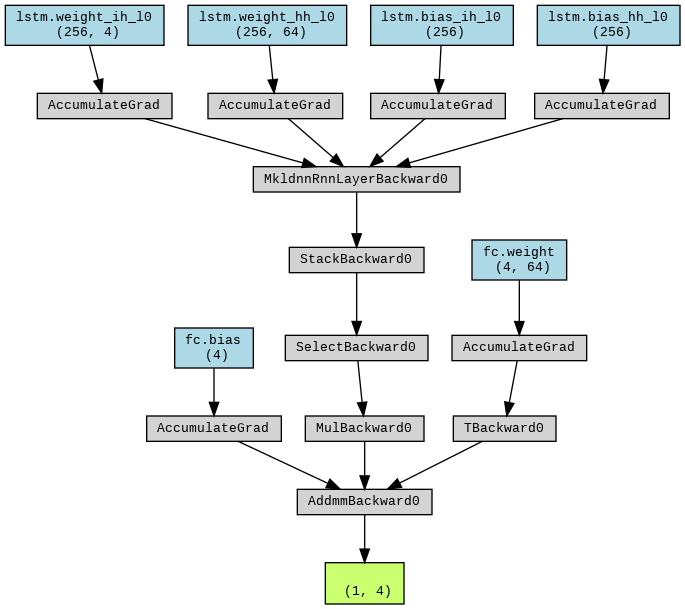

In [ ]:
# Create the model instance
num_feature = 4  # Adjust this according to your features
model = NeuralNetwork(num_feature)

# Push to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Generate a random input tensor
x = torch.randn(1, 10, num_feature).to(device)  # (batch_size, sequence_length, num_features)

# Visualize the model architecture using torchviz
try:
    y = model(x)  # Forward pass to generate graph
    graph = make_dot(y, params=dict(model.named_parameters()))
    graph.render("model_lstm", format="png")  # Save as PNG
    print("Model architecture saved as 'model_lstm.png'.")

    # Display the saved image in the Jupyter Notebook
    display(Image(filename="model_lstm.png"))
except Exception as e:
    print(f"Error plotting model architecture: {e}")

In [ ]:
model_10d = NeuralNetwork(5)
optimizer = optim.Adam(model_10d.parameters())

In [ ]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_10d, train_dataloader_10d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_10d, val_dataloader_10d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 1.9911, Valid Loss: 0.2425
Epoch [2/50], Train Loss: 3.8967, Valid Loss: 0.0259
Epoch [3/50], Train Loss: 5.1969, Valid Loss: 0.0118
Epoch [4/50], Train Loss: 2.8942, Valid Loss: 0.0046
Epoch [5/50], Train Loss: 1.1816, Valid Loss: 0.0076
Epoch [6/50], Train Loss: 1.0013, Valid Loss: 0.0055
Epoch [7/50], Train Loss: 0.9396, Valid Loss: 0.0038
Epoch [8/50], Train Loss: 0.9327, Valid Loss: 0.0070
Epoch [9/50], Train Loss: 0.9423, Valid Loss: 0.0033
Epoch [10/50], Train Loss: 0.9281, Valid Loss: 0.0055
Epoch [11/50], Train Loss: 0.8805, Valid Loss: 0.0021
Epoch [12/50], Train Loss: 0.7756, Valid Loss: 0.0021
Epoch [13/50], Train Loss: 0.6430, Valid Loss: 0.0052
Epoch [14/50], Train Loss: 0.6347, Valid Loss: 0.0044
Epoch [15/50], Train Loss: 0.6152, Valid Loss: 0.0015
Epoch [16/50], Train Loss: 0.5681, Valid Loss: 0.0017
Epoch [17/50], Train Loss: 0.5005, Valid Loss: 0.0054
Epoch [18/50], Train Loss: 0.5818, Valid Loss: 0.0037
Epoch [19/50], Train Loss: 0.6300, Va

In [ ]:
x_test_10d = torch.tensor(x_test_10d).float()
y_test_10d = torch.tensor(y_test_10d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_10d = model_10d(x_test_10d)

# Convert predictions and actual test data to numpy arrays
y_pred_10d = y_pred_10d.numpy()
y_test_10d = y_test_10d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_10d = y_pred_10d.reshape(-1, y_pred_10d.shape[-1])[:, -1]

In [ ]:
model_20d = NeuralNetwork(5)
optimizer = optim.Adam(model_20d.parameters())

In [ ]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_20d, train_dataloader_20d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_20d, val_dataloader_20d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 1.8889, Valid Loss: 0.2184
Epoch [2/50], Train Loss: 2.9346, Valid Loss: 0.1057
Epoch [3/50], Train Loss: 4.5588, Valid Loss: 0.0069
Epoch [4/50], Train Loss: 3.3667, Valid Loss: 0.0041
Epoch [5/50], Train Loss: 1.4811, Valid Loss: 0.0030
Epoch [6/50], Train Loss: 0.8638, Valid Loss: 0.0046
Epoch [7/50], Train Loss: 0.8442, Valid Loss: 0.0060
Epoch [8/50], Train Loss: 0.7563, Valid Loss: 0.0060
Epoch [9/50], Train Loss: 0.8122, Valid Loss: 0.0052
Epoch [10/50], Train Loss: 0.8356, Valid Loss: 0.0031
Epoch [11/50], Train Loss: 0.8580, Valid Loss: 0.0039
Epoch [12/50], Train Loss: 0.8024, Valid Loss: 0.0018
Epoch [13/50], Train Loss: 0.6889, Valid Loss: 0.0036
Epoch [14/50], Train Loss: 0.6890, Valid Loss: 0.0019
Epoch [15/50], Train Loss: 0.5915, Valid Loss: 0.0017
Epoch [16/50], Train Loss: 0.5754, Valid Loss: 0.0025
Epoch [17/50], Train Loss: 0.4915, Valid Loss: 0.0021
Epoch [18/50], Train Loss: 0.5015, Valid Loss: 0.0029
Epoch [19/50], Train Loss: 0.5166, Va

In [ ]:
x_test_20d = torch.tensor(x_test_20d).float()
y_test_20d = torch.tensor(y_test_20d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_20d = model_20d(x_test_20d)

# Convert predictions and actual test data to numpy arrays
y_pred_20d = y_pred_20d.numpy()
y_test_20d = y_test_20d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_20d = y_pred_20d.reshape(-1, y_pred_20d.shape[-1])[:, -1]

In [ ]:
model_all = NeuralNetwork(6)
optimizer = optim.Adam(model_all.parameters())

In [ ]:
epochs=100
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_all, train_dataloader_all, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_all, val_dataloader_all, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/100], Train Loss: 1.8804, Valid Loss: 0.1969
Epoch [2/100], Train Loss: 2.7341, Valid Loss: 0.1362
Epoch [3/100], Train Loss: 4.6229, Valid Loss: 0.0088
Epoch [4/100], Train Loss: 3.7020, Valid Loss: 0.0048
Epoch [5/100], Train Loss: 1.5327, Valid Loss: 0.0052
Epoch [6/100], Train Loss: 0.8896, Valid Loss: 0.0073
Epoch [7/100], Train Loss: 0.8739, Valid Loss: 0.0063
Epoch [8/100], Train Loss: 0.8838, Valid Loss: 0.0082
Epoch [9/100], Train Loss: 0.9548, Valid Loss: 0.0052
Epoch [10/100], Train Loss: 0.9759, Valid Loss: 0.0031
Epoch [11/100], Train Loss: 0.8416, Valid Loss: 0.0029
Epoch [12/100], Train Loss: 0.8119, Valid Loss: 0.0017
Epoch [13/100], Train Loss: 0.7172, Valid Loss: 0.0030
Epoch [14/100], Train Loss: 0.6384, Valid Loss: 0.0017
Epoch [15/100], Train Loss: 0.5704, Valid Loss: 0.0019
Epoch [16/100], Train Loss: 0.5208, Valid Loss: 0.0027
Epoch [17/100], Train Loss: 0.5068, Valid Loss: 0.0032
Epoch [18/100], Train Loss: 0.5409, Valid Loss: 0.0015
Epoch [19/100], Tra

In [ ]:
x_test_all = torch.tensor(x_test_all).float()
y_test_all = torch.tensor(y_test_all).float()

# predict on the test data
with torch.no_grad():
    y_pred_all = model_all(x_test_all)

y_pred_all = y_pred_all.numpy()
y_test_all = y_test_all.numpy()

# reshape & select last element from prediction (closing price)
y_pred_all = y_pred_all.reshape(-1, y_pred_all.shape[-1])[:, -1]

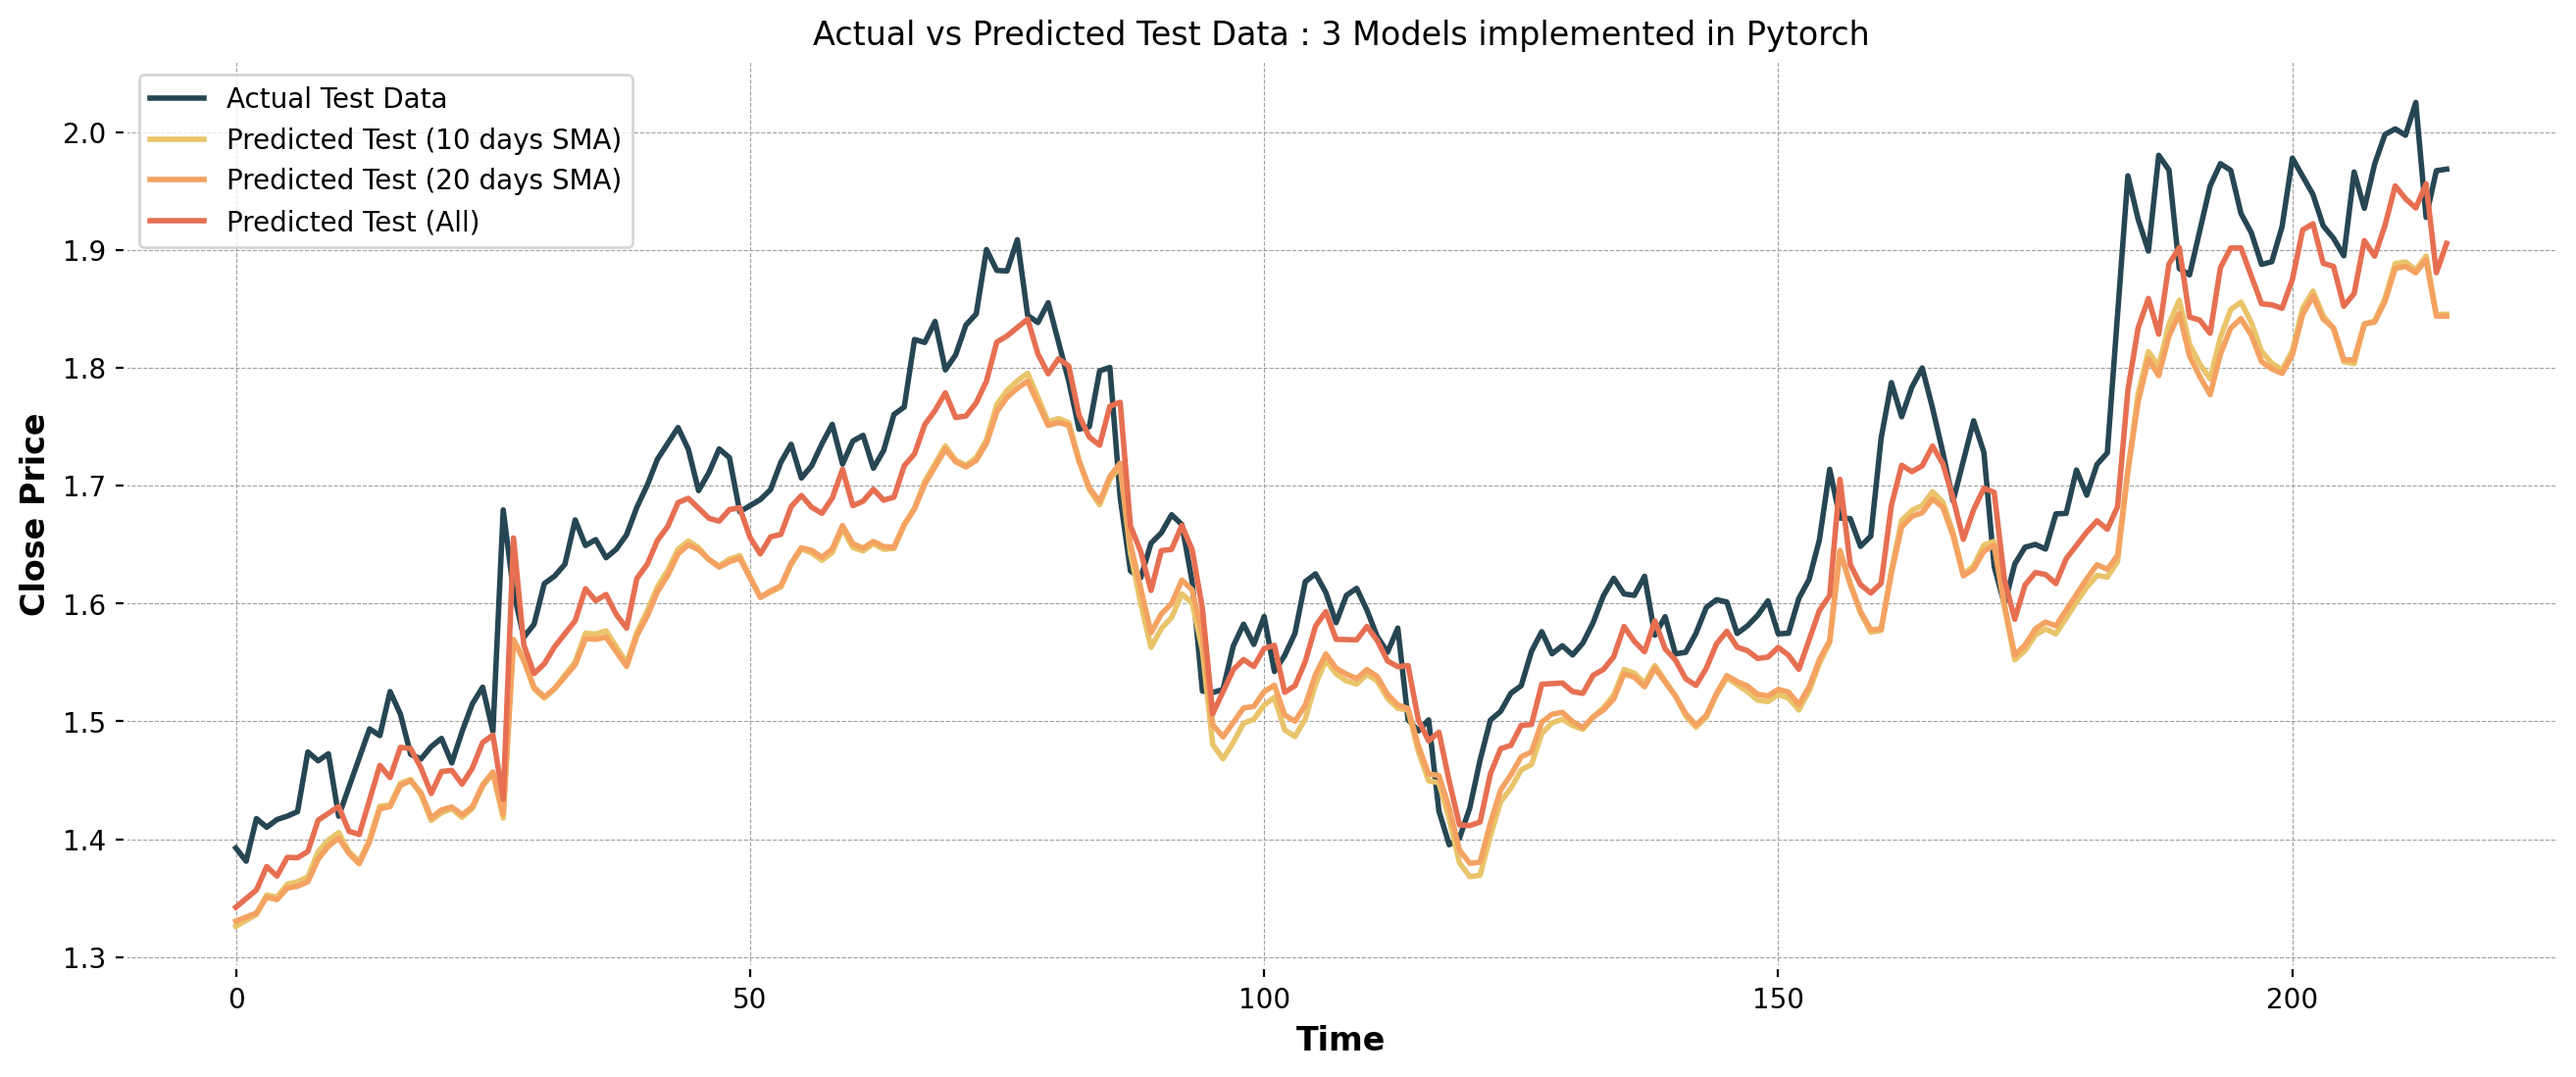

In [ ]:
plt.figure(figsize=(16,6), dpi=200)

plt.plot(y_test_10d, label='Actual Test Data', color='#264653')
plt.plot(y_pred_10d, label='Predicted Test (10 days SMA)', color='#e9c46a')
plt.plot(y_pred_20d, label='Predicted Test (20 days SMA)', color='#f4a261')
plt.plot(y_pred_all, label='Predicted Test (All)', color='#e76f51')

plt.title('Actual vs Predicted Test Data : 3 Models implemented in Pytorch')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.legend()
plt.show()

In [ ]:
# Get the last sequence of data as features for predicting the next 10 days
last_sequence = sequence_all[-1:, :, :]
last_sequence = torch.from_numpy(last_sequence).float()

# Generate predictions for the next 10 days
days_num = 10
with torch.no_grad():
    for i in range(days_num):
        pred = model_all(last_sequence)  # This should be of shape (1, 1, features)

        # Reshape pred to match the dimensions of last_sequence for concatenation
        pred = pred.unsqueeze(1)  # Add sequence length dimension (1, 1, features)

        last_sequence = torch.cat((last_sequence, pred), dim=1)  # Concatenate along sequence length
        last_sequence = last_sequence[:, 1:, :]  # Keep the last sequence length of data

# Convert predictions to numpy array
predicting_days = last_sequence.squeeze().numpy()

# Inverse transform the predicted values
predicting_days = scaler.inverse_transform(predicting_days)

# Extract relevant features (Open, High, Low, Close)
predicting_days = predicting_days[:days_num, :4]

# Create a DataFrame to store the predicted prices
df_pred = pd.DataFrame(
    data=predicting_days,
    columns=['Open', 'High', 'Low', 'Close']
)

# Get the last date in the main DataFrame
last_date_in_df = df['Date'].iloc[-1]

# Generate dates for the next 10 days after the last date in the main DataFrame
next_dates = pd.date_range(start=last_date_in_df + pd.Timedelta(days=1), periods=days_num)

# Create a DataFrame with the dates
df_dates = pd.DataFrame({'Date': next_dates})

# Concatenate the two DataFrames
df_combined = pd.concat([df_dates, df_pred], axis=1)

print(df_combined)

                       Date        Open        High         Low       Close
0 2025-01-30 00:00:00-05:00  197.369980  198.460007  195.190002  197.809998
1 2025-01-31 00:00:00-05:00  193.275970  193.230820  193.316498  193.317307
2 2025-02-01 00:00:00-05:00  188.669785  188.620544  188.707489  188.701797
3 2025-02-02 00:00:00-05:00  184.141068  184.090347  184.175034  184.168121
4 2025-02-03 00:00:00-05:00  179.806168  179.755600  179.836868  179.829651
5 2025-02-04 00:00:00-05:00  175.657196  175.607651  175.685150  175.678009
6 2025-02-05 00:00:00-05:00  171.706909  171.658813  171.732452  171.725555
7 2025-02-06 00:00:00-05:00  167.962082  167.915710  167.985641  167.979034
8 2025-02-07 00:00:00-05:00  164.424774  164.380234  164.446594  164.440353
9 2025-02-08 00:00:00-05:00  161.096909  161.054291  161.117294  161.111359
